In [156]:
lala = pd.read_csv('player_stats.csv')
lala.drop('Unnamed: 0', axis = 1, inplace = True)
subset = ['G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB',
          'AST','STL','BLK','TOV','PF','PTS']
lala.dropna(subset=subset,axis =0,inplace=True, how ='all') 
lala.info()
lala

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 0 to 4503
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  4390 non-null   object 
 1   Pos     4390 non-null   object 
 2   G       4390 non-null   float64
 3   GS      3181 non-null   float64
 4   MP      4233 non-null   float64
 5   FG      4390 non-null   float64
 6   FGA     4390 non-null   float64
 7   FG%     4372 non-null   float64
 8   3P      3373 non-null   float64
 9   3PA     3373 non-null   float64
 10  3P%     2964 non-null   float64
 11  2P      3452 non-null   float64
 12  2PA     3452 non-null   float64
 13  2P%     3423 non-null   float64
 14  eFG%    3435 non-null   float64
 15  FT      4390 non-null   float64
 16  FTA     4390 non-null   float64
 17  FT%     4205 non-null   float64
 18  ORB     3630 non-null   float64
 19  DRB     3630 non-null   float64
 20  TRB     4274 non-null   float64
 21  AST     4390 non-null   float64
 22  

Player                       Pos       G     GS    MP  \
0          Alaa Abdelnaby             Power Forward   256.0   53.0  12.5   
1         Zaid Abdul-Aziz  Center and Power Forward   505.0    NaN  21.8   
2     Kareem Abdul-Jabbar                    Center  1560.0  625.0  36.8   
3      Mahmoud Abdul-Rauf               Point Guard   586.0  336.0  26.7   
4       Tariq Abdul-Wahad            Shooting Guard   236.0  145.0  20.4   
...                   ...                       ...     ...    ...   ...   
4499          Paul Zipser             Small Forward    98.0   30.0  17.0   
4500           Ante Žižić                    Center   113.0   27.0  13.4   
4501             Jim Zoet                    Center     7.0    0.0   4.3   
4502            Bill Zopf               Point Guard    53.0    NaN   7.5   
4503          Ivica Zubac                    Center   271.0  138.0  17.3   

        FG   FGA    FG%   3P  3PA  ...    FT%  ORB  DRB   TRB  AST  STL  BLK  \
0      2.4   4.8  0.502  0.0  0.0  ...  0.701  1.1  2.2   3.3  0.3  0.3  0.3   
1      3.5   8.2  0.428  NaN  NaN  ...  0.728  2.4  5.4   8.0  1.2  0.6  1.0   
2     10.2  18.1  0.559  0.0  0.0  ...  0.721  2.4  7.6  11.2  3.6  0.9  2.6   
3      6.0  13.6  0.442  0.8  2.3  ...  0.905  0.4  1.5   1.9  3.5  0.8  0.1   
4      3.1   7.3  0.417  0.1  0.3  ...  0.703  1.2  2.1   3.3  1.1  0.8  0.4   
...    ...   ...    ...  ...  ...  ...    ...  ...  ...   ...  ...  ...  ...   
4499   1.7   4.6  0.371  0.7  2.1  ...  0.769  0.3  2.3   2.6  0.8  0.4  0.3   
4500   2.4   4.2  0.581  0.0  0.0  ...  0.711  1.3  2.6   3.9  0.6  0.2  0.4   
4501   0.1   0.7  0.200  0.0  0.0  ...    NaN  0.4  0.7   1.1  0.1  0.1  0.4   
4502   0.9   2.5  0.363  NaN  NaN  ...  0.556  NaN  NaN   0.9  1.4  NaN  NaN   
4503   3.1   5.3  0.584  0.0  0.0  ...  0.769  2.1  3.9   6.0  1.0  0.3  0.8   

      TOV   PF   PTS  
0     1.0  1.9   5.7  
1     0.9  2.2   9.0  
2     2.7  3.0  24.6  
3     1.6  1.9  14.6  
4     1.3  2.1   7.8  
...   ...  ...   ...  
4499  0.8  1.7   4.7  
4500  0.7  1.5   6.0  
4501  0.6  1.3   0.3  
4502  NaN  0.6   2.2  
4503  0.9  2.1   7.7  

[4390 rows x 27 columns]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, precision_score, recall_score, \
                            precision_recall_curve, accuracy_score, silhouette_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from collections import defaultdict

In [2]:
all_player_stats = pd.read_csv('player_stats.csv')
all_player_stats.drop('Unnamed: 0', axis = 1, inplace = True)

## Data Cleaning

To resolve the issue of discrepancies in playing time among players, we will use per games statistics.

In [3]:
all_player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4504 entries, 0 to 4503
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  4504 non-null   object 
 1   Pos     4504 non-null   object 
 2   G       4390 non-null   float64
 3   GS      3181 non-null   float64
 4   MP      4233 non-null   float64
 5   FG      4390 non-null   float64
 6   FGA     4390 non-null   float64
 7   FG%     4372 non-null   float64
 8   3P      3373 non-null   float64
 9   3PA     3373 non-null   float64
 10  3P%     2964 non-null   float64
 11  2P      3452 non-null   float64
 12  2PA     3452 non-null   float64
 13  2P%     3423 non-null   float64
 14  eFG%    3435 non-null   float64
 15  FT      4390 non-null   float64
 16  FTA     4390 non-null   float64
 17  FT%     4205 non-null   float64
 18  ORB     3630 non-null   float64
 19  DRB     3630 non-null   float64
 20  TRB     4274 non-null   float64
 21  AST     4390 non-null   float64
 22  

Keeping things consistent - some players played in the NBA, ABA, BAA so we're only considering those who played in the NBA and their respective NBA stats
Removed rows where all stats are blank (these are players who have never played in the NBA - only played in ABA or BAA)

In [4]:
subset = ['G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB',
          'AST','STL','BLK','TOV','PF','PTS']
all_player_stats.dropna(subset=subset,axis =0,inplace=True, how ='all') 

Some players are assigned multiple positions because they played different positions for different teams. Since we are using the positions as our targets, we will need to narrow it down to one. We will use the first assigned position listed since that is the position that the player held the most throughout their career.

In [5]:
all_player_stats.Pos.unique()

array(['Power Forward', 'Center and Power Forward', 'Center',
       'Point Guard', 'Shooting Guard',
       'Power Forward, Small Forward, and Center',
       'Small Forward and Power Forward', 'Guard', 'Small Forward',
       'Power Forward and Small Forward',
       'Shooting Guard and Small Forward',
       'Shooting Guard and Point Guard', 'Power Forward and Center',
       'Point Guard and Shooting Guard',
       'Shooting Guard, Small Forward, and Point Guard',
       'Small Forward and Shooting Guard', 'Forward',
       'Power Forward, Small Forward, Shooting Guard, and Point Guard',
       'Center/Forward', 'Guard/Forward', 'Forward/Center',
       'Small Forward and Point Guard',
       'Small Forward, Shooting Guard, and Power Forward',
       'Center, Power Forward, and Small Forward', 'Forward/Guard',
       'Small Forward, Power Forward, and Center',
       'Shooting Guard, Small Forward, and Power Forward',
       'Small Forward, Power Forward, and Shooting Guard',
     

Shooting Guard is the position with the most letters - can use this to filter for players that are assigned multiple positions. Only pull the first position

In [6]:
# players categorized with more than one position
all_player_stats[all_player_stats['Pos'].apply(len) > len('Shooting Guard')]

Player                                       Pos      G  \
1         Zaid Abdul-Aziz                  Center and Power Forward  505.0   
5     Shareef Abdur-Rahim  Power Forward, Small Forward, and Center  830.0   
6           Tom Abernethy           Small Forward and Power Forward  319.0   
14             Quincy Acy           Power Forward and Small Forward  337.0   
15            Alvan Adams                  Center and Power Forward  988.0   
...                   ...                                       ...    ...   
4451       Brandan Wright                  Power Forward and Center  428.0   
4454         Delon Wright            Point Guard and Shooting Guard  319.0   
4465          Tony Wroten            Point Guard and Shooting Guard  145.0   
4481            Sam Young          Small Forward and Shooting Guard  249.0   
4487         Zeke Zawoluk           Power Forward and Small Forward  179.0   

         GS    MP   FG   FGA    FG%   3P  3PA  ...    FT%  ORB  DRB  TRB  AST  \
1       NaN  21.8  3.5   8.2  0.428  NaN  NaN  ...  0.728  2.4  5.4  8.0  1.2   
5     704.0  34.8  6.5  13.9  0.472  0.2  0.6  ...  0.810  2.3  5.3  7.5  2.5   
6       NaN  17.0  2.3   4.6  0.492  0.0  0.0  ...  0.747  1.2  2.0  3.2  1.2   
14     60.0  16.0  1.7   3.9  0.444  0.5  1.6  ...  0.759  0.9  2.6  3.5  0.6   
15    342.0  27.5  5.8  11.6  0.498  0.0  0.0  ...  0.788  2.0  5.0  7.0  4.1   
...     ...   ...  ...   ...    ...  ...  ...  ...    ...  ...  ...  ...  ...   
4451   62.0  16.2  3.0   4.9  0.607  0.0  0.0  ...  0.674  1.4  2.3  3.6  0.5   
4454   54.0  20.9  2.8   6.2  0.451  0.7  1.9  ...  0.795  0.8  2.4  3.2  3.1   
4465   34.0  21.2  4.0   9.6  0.413  0.6  2.5  ...  0.647  0.7  1.8  2.5  3.0   
4481   52.0  15.9  2.2   5.1  0.442  0.2  0.7  ...  0.742  0.7  1.6  2.3  0.7   
4487    NaN  19.7  2.2   5.9  0.372  NaN  NaN  ...  0.767  NaN  NaN  4.1  1.2   

      STL  BLK  TOV   PF   PTS  
1     0.6  1.0  0.9  2.2   9.0  
5     1.0  0.8  2.6  2.8  18.1  
6     0.6  0.2  0.5  1.6   5.6  
14    0.4  0.4  0.6  2.0   4.9  
15    1.3  0.8  2.6  3.3  14.1  
...   ...  ...  ...  ...   ...  
4451  0.5  1.0  0.5  1.3   7.0  
4454  1.1  0.4  1.0  1.2   7.6  
4465  0.9  0.2  2.6  1.8  11.1  
4481  0.5  0.2  0.8  1.2   5.8  
4487  NaN  NaN  NaN  2.5   6.8  

[1290 rows x 27 columns]

In [7]:
# players categorized one position
all_player_stats[all_player_stats['Pos'].apply(len) <= len('Shooting Guard')]

Player             Pos       G     GS    MP    FG   FGA  \
0          Alaa Abdelnaby   Power Forward   256.0   53.0  12.5   2.4   4.8   
2     Kareem Abdul-Jabbar          Center  1560.0  625.0  36.8  10.2  18.1   
3      Mahmoud Abdul-Rauf     Point Guard   586.0  336.0  26.7   6.0  13.6   
4       Tariq Abdul-Wahad  Shooting Guard   236.0  145.0  20.4   3.1   7.3   
7             Forest Able           Guard     1.0    NaN   1.0   0.0   2.0   
...                   ...             ...     ...    ...   ...   ...   ...   
4499          Paul Zipser   Small Forward    98.0   30.0  17.0   1.7   4.6   
4500           Ante Žižić          Center   113.0   27.0  13.4   2.4   4.2   
4501             Jim Zoet          Center     7.0    0.0   4.3   0.1   0.7   
4502            Bill Zopf     Point Guard    53.0    NaN   7.5   0.9   2.5   
4503          Ivica Zubac          Center   271.0  138.0  17.3   3.1   5.3   

        FG%   3P  3PA  ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF  \
0     0.502  0.0  0.0  ...  0.701  1.1  2.2   3.3  0.3  0.3  0.3  1.0  1.9   
2     0.559  0.0  0.0  ...  0.721  2.4  7.6  11.2  3.6  0.9  2.6  2.7  3.0   
3     0.442  0.8  2.3  ...  0.905  0.4  1.5   1.9  3.5  0.8  0.1  1.6  1.9   
4     0.417  0.1  0.3  ...  0.703  1.2  2.1   3.3  1.1  0.8  0.4  1.3  2.1   
7     0.000  NaN  NaN  ...    NaN  NaN  NaN   1.0  1.0  NaN  NaN  NaN  1.0   
...     ...  ...  ...  ...    ...  ...  ...   ...  ...  ...  ...  ...  ...   
4499  0.371  0.7  2.1  ...  0.769  0.3  2.3   2.6  0.8  0.4  0.3  0.8  1.7   
4500  0.581  0.0  0.0  ...  0.711  1.3  2.6   3.9  0.6  0.2  0.4  0.7  1.5   
4501  0.200  0.0  0.0  ...    NaN  0.4  0.7   1.1  0.1  0.1  0.4  0.6  1.3   
4502  0.363  NaN  NaN  ...  0.556  NaN  NaN   0.9  1.4  NaN  NaN  NaN  0.6   
4503  0.584  0.0  0.0  ...  0.769  2.1  3.9   6.0  1.0  0.3  0.8  0.9  2.1   

       PTS  
0      5.7  
2     24.6  
3     14.6  
4      7.8  
7      0.0  
...    ...  
4499   4.7  
4500   6.0  
4501   0.3  
4502   2.2  
4503   7.7  

[3100 rows x 27 columns]

Below code takes care of the rows that have multiple positions listed out with commas, have ands or slashes - more cleaning need to be done
Cannot split by '/' and remove with the below code - need both positions to decide what position it is (i.e. if we take the first position it might generically say guard - won't know which guard, second position gives us more insight. Guard/Forward -> Shooting Guard)

In [8]:
# Takes care of the rows that have multiple positions listed out with commas, have ands or slashes - more cleaning need to be done
all_player_stats['Target'] = all_player_stats['Pos'].apply(lambda x: x.split(',')[0] if ',' in x else x.split(',')[0].split(' and ')[0])


In [9]:
all_player_stats['Target'].unique()

array(['Power Forward', 'Center', 'Point Guard', 'Shooting Guard',
       'Small Forward', 'Guard', 'Forward', 'Center/Forward',
       'Guard/Forward', 'Forward/Center', 'Forward/Guard',
       'Point Guard\n'], dtype=object)

There are 156 players that are categorized generically as a guard or a forward - hard to put them in a position without looking at them individually and make judgement calls on my end. Will be dropping these players from the dataset which is only about 3.4%

In [10]:
index = all_player_stats.index
condition = (all_player_stats['Target']=='Guard') | (all_player_stats['Target']=='Forward')
rows_to_drop_indices = index[condition]
all_player_stats.drop(rows_to_drop_indices, axis = 0, inplace=True)

In [11]:
all_player_stats['Target'].unique()

array(['Power Forward', 'Center', 'Point Guard', 'Shooting Guard',
       'Small Forward', 'Center/Forward', 'Guard/Forward',
       'Forward/Center', 'Forward/Guard', 'Point Guard\n'], dtype=object)

Further cleaning the Target column - classifying those with '/' with the first position and changing guard to the corresponding position etc.

In [12]:
all_player_stats['Target'].replace(['Center/Forward','Guard/Forward','Forward/Center','Forward/Guard','Point Guard\n'],
                        ['Center', 'Shooting Guard','Power Forward', 'Small Forward', 'Point Guard'], inplace = True)

In [13]:
# Targets look good
all_player_stats['Target'].unique()

array(['Power Forward', 'Center', 'Point Guard', 'Shooting Guard',
       'Small Forward'], dtype=object)

Add in another feature: 1 - multiple positions, 0 - single position, see if this improves out model. Only meant to use informatively, cannot use for final model! It would be cheating!

In [14]:
all_player_stats['Num_Pos'] = all_player_stats['Pos'].apply(len) > len('Shooting Guard')
classify = {True:1, False:0}
all_player_stats['Num_Pos'] = all_player_stats['Num_Pos'].map(classify)

In [15]:
all_player_stats.head()

Player                       Pos       G     GS    MP    FG  \
0       Alaa Abdelnaby             Power Forward   256.0   53.0  12.5   2.4   
1      Zaid Abdul-Aziz  Center and Power Forward   505.0    NaN  21.8   3.5   
2  Kareem Abdul-Jabbar                    Center  1560.0  625.0  36.8  10.2   
3   Mahmoud Abdul-Rauf               Point Guard   586.0  336.0  26.7   6.0   
4    Tariq Abdul-Wahad            Shooting Guard   236.0  145.0  20.4   3.1   

    FGA    FG%   3P  3PA  ...  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0   4.8  0.502  0.0  0.0  ...  2.2   3.3  0.3  0.3  0.3  1.0  1.9   5.7   
1   8.2  0.428  NaN  NaN  ...  5.4   8.0  1.2  0.6  1.0  0.9  2.2   9.0   
2  18.1  0.559  0.0  0.0  ...  7.6  11.2  3.6  0.9  2.6  2.7  3.0  24.6   
3  13.6  0.442  0.8  2.3  ...  1.5   1.9  3.5  0.8  0.1  1.6  1.9  14.6   
4   7.3  0.417  0.1  0.3  ...  2.1   3.3  1.1  0.8  0.4  1.3  2.1   7.8   

           Target  Num_Pos  
0   Power Forward        0  
1          Center        1  
2          Center        0  
3     Point Guard        0  
4  Shooting Guard        0  

[5 rows x 29 columns]

## Prelim EDA

In [16]:
all_player_stats.describe()

G           GS           MP           FG          FGA  \
count  4234.000000  3181.000000  4142.000000  4234.000000  4234.000000   
mean    295.242088   141.156869    16.821704     2.542844     5.857865   
std     316.689540   235.404736     8.918755     1.848600     3.919277   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      41.000000     0.000000     9.500000     1.200000     2.900000   
50%     153.000000    22.000000    15.900000     2.100000     4.900000   
75%     501.750000   178.000000    23.400000     3.400000     8.000000   
max    1611.000000  1471.000000    45.800000    12.100000    23.800000   

               FG%           3P          3PA          3P%           2P  ...  \
count  4217.000000  3372.000000  3372.000000  2963.000000  3450.000000  ...   
mean      0.420155     0.345907     1.041044     0.248714     2.190029  ...   
std       0.095464     0.499318     1.343152     0.155824     1.742169  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.383000     0.000000     0.000000     0.152000     0.900000  ...   
50%       0.430000     0.100000     0.400000     0.286000     1.700000  ...   
75%       0.469000     0.500000     1.700000     0.348000     3.000000  ...   
max       1.000000     3.700000     8.500000     1.000000    10.800000  ...   

               ORB          DRB          TRB          AST          STL  \
count  3629.000000  3629.000000  4165.000000  4234.000000  3601.000000   
mean      0.877074     2.030973     3.052725     1.493269     0.553430   
std       0.707429     1.504986     2.289070     1.402677     0.399034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.400000     0.900000     1.400000     0.500000     0.300000   
50%       0.700000     1.700000     2.500000     1.100000     0.500000   
75%       1.200000     2.700000     4.100000     2.000000     0.800000   
max       5.100000    10.500000    22.900000    11.200000     2.700000   

               BLK          TOV           PF          PTS      Num_Pos  
count  3601.000000  3463.000000  4234.000000  4234.000000  4234.000000  
mean      0.321161     1.051516     1.784766     6.655007     0.304676  
std       0.382168     0.691169     0.844228     4.868962     0.460325  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.100000     0.600000     1.100000     3.000000     0.000000  
50%       0.200000     0.900000     1.800000     5.400000     0.000000  
75%       0.400000     1.400000     2.400000     9.000000     1.000000  
max       3.500000     4.200000     5.000000    30.100000     1.000000  

[8 rows x 26 columns]

From the above chart it shows min games played by someone is 1 game! Should drop players that only played a few games since stats are per game. Data is total career averages - those who played very litte games, the data might not be representative of their true performance i.e. could be a rookie (since this is career total for all basketball players thus far which includes current rookies, or it could be a 10-day contract deal like Antonio Anderson had done with OKC). Per season - each team plays 82 games.

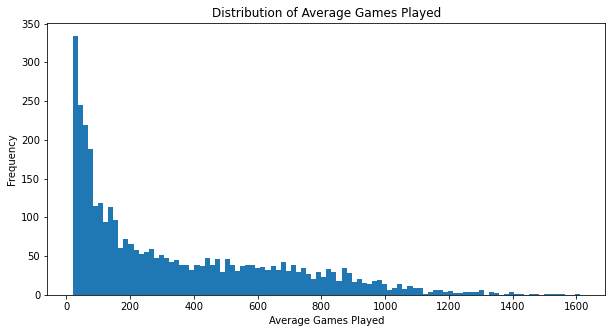

In [142]:
all_player_stats['G'].hist(grid=False,bins=100,figsize=(10,5))
plt.xlabel('Average Games Played')
plt.ylabel('Frequency')
plt.title('Distribution of Average Games Played');

Looking at the distribution of average games played - there isn't an obvious threshold of min games played to consider. Doing intuitively - given that there are 82 games in a season, and not all players play for the whole game, I would say drop players that have played <20 games (~ 1/4 of a season)

In [18]:
# dropping players that played less than 20 games in their total career
all_player_stats = all_player_stats[all_player_stats['G'] >=20]

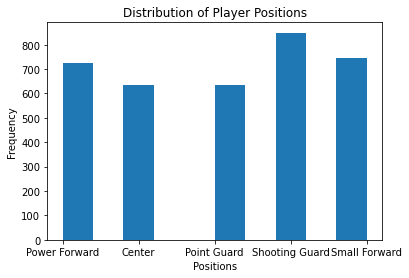

In [19]:
# Positions are pretty evenly distributed
fig,ax = plt.subplots()
ax.hist(all_player_stats['Target'])
ax.set_xlabel('Positions')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Player Positions');

In [20]:
summary = all_player_stats.groupby('Target').mean()
summary

G          GS         MP        FG       FGA  \
Target                                                                  
Center          378.150943  186.788732  17.486591  2.651101  5.573742   
Point Guard     376.148265  177.647410  20.189274  2.941009  6.945110   
Power Forward   357.488243  164.027076  18.066619  2.754080  6.110512   
Shooting Guard  306.733804  148.584459  18.448848  2.962191  6.989164   
Small Forward   330.427041  171.608187  18.478493  2.903481  6.668273   

                     FG%        3P       3PA       3P%        2P  ...  \
Target                                                            ...   
Center          0.470283  0.064535  0.209884  0.151496  2.515720  ...   
Point Guard     0.412360  0.565348  1.668550  0.295758  2.393333  ...   
Power Forward   0.447169  0.226976  0.696220  0.222309  2.494975  ...   
Shooting Guard  0.412163  0.592031  1.704375  0.295231  2.437500  ...   
Small Forward   0.425000  0.444746  1.302174  0.272854  2.557292  ...   

                     ORB       DRB       TRB       AST       STL       BLK  \
Target                                                                       
Center          1.522342  3.163964  4.954808  0.936635  0.417122  0.773042   
Point Guard     0.461141  1.590374  2.132808  3.367192  0.849910  0.128725   
Power Forward   1.385089  2.924311  4.498731  1.056846  0.507061  0.467816   
Shooting Guard  0.584263  1.583691  2.237304  1.782450  0.675793  0.186888   
Small Forward   0.951050  2.188530  3.322177  1.289157  0.619870  0.295114   

                     TOV        PF       PTS   Num_Pos  
Target                                                  
Center          1.056926  2.257547  6.762264  0.251572  
Point Guard     1.495028  1.760568  7.873502  0.269716  
Power Forward   1.051265  2.119779  7.131120  0.423237  
Shooting Guard  1.150379  1.716608  7.822026  0.395760  
Small Forward   1.085095  1.882329  7.593708  0.390897  

[5 rows x 26 columns]

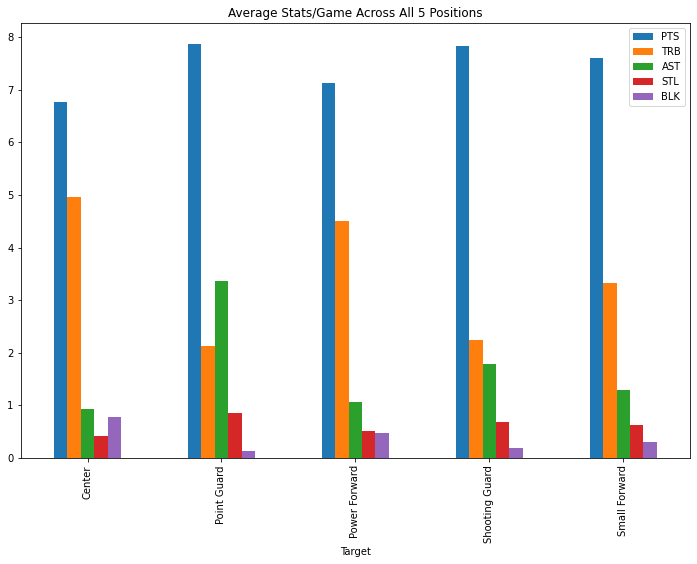

In [21]:
bar_chart_df = summary[['PTS', 'TRB', 'AST', 'STL', 'BLK']]
bar_chart_df.plot(kind='bar', figsize = (12, 8), title='Average Stats/Game Across All 5 Positions');

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


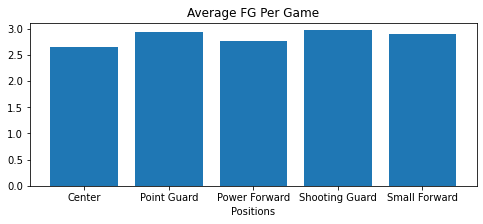

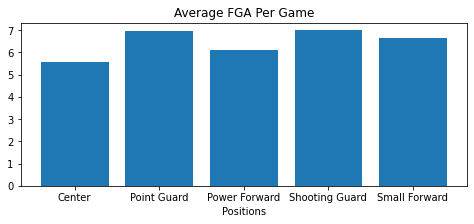

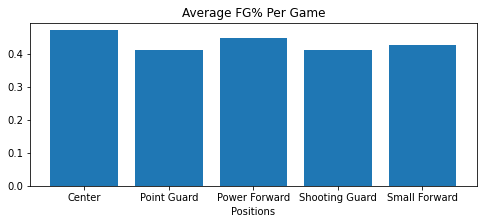

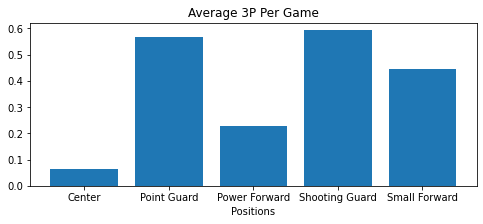

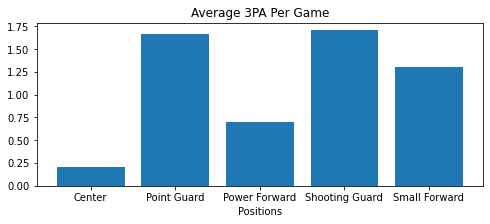

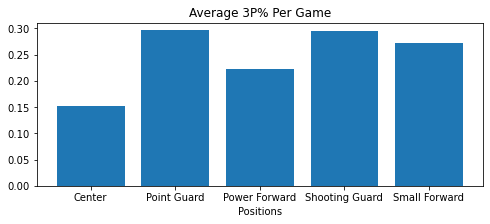

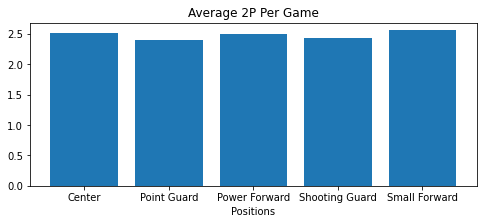

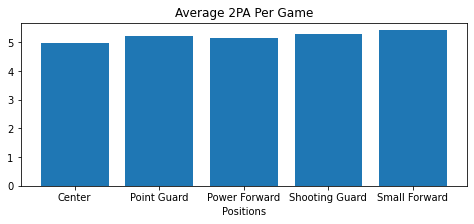

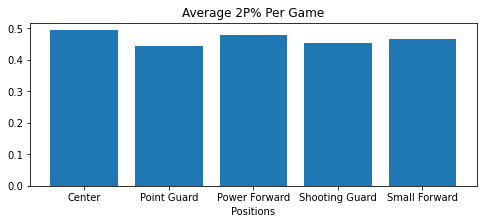

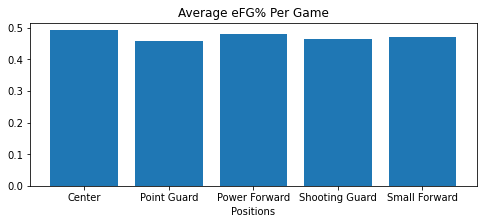

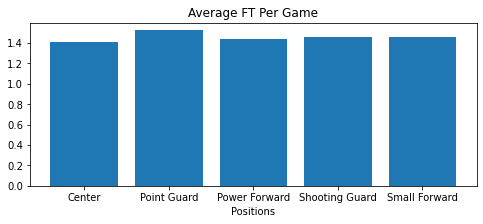

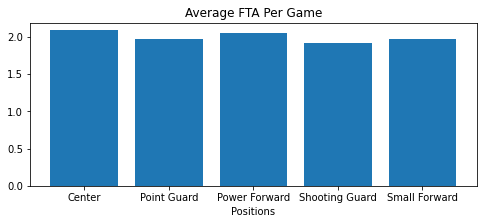

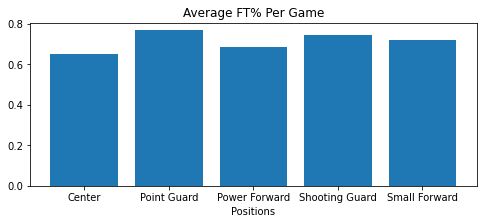

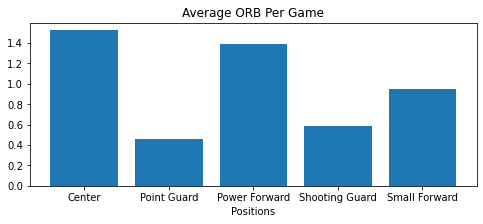

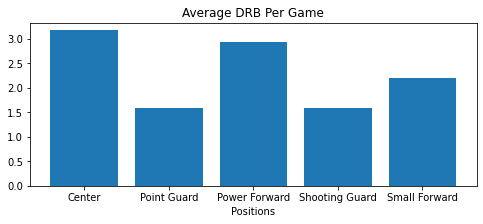

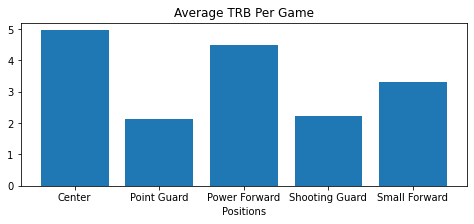

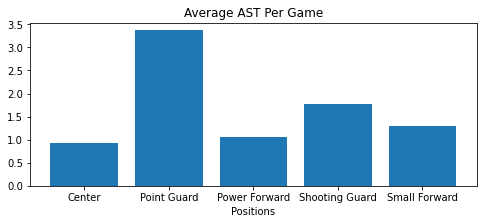

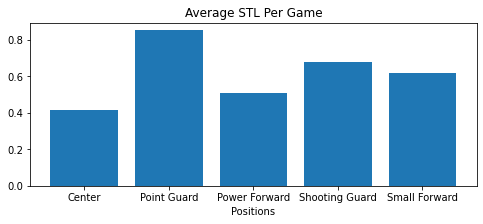

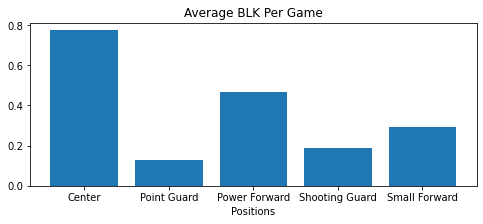

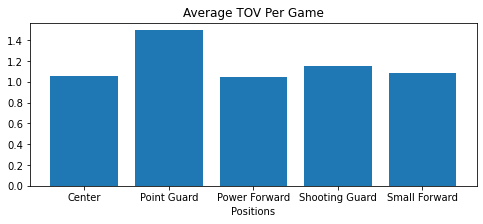

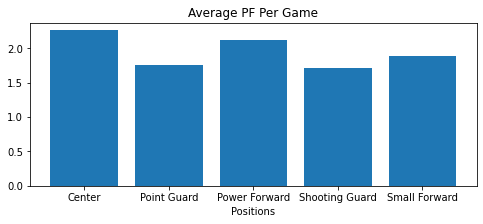

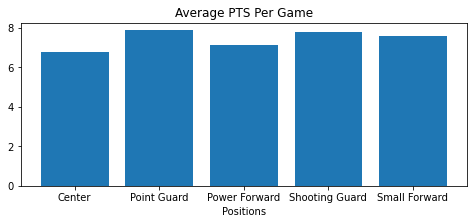

In [22]:
for feature in summary.drop(['Num_Pos','G','GS','MP'],axis=1).columns:
    fig, ax = plt.subplots(figsize = (8,3))
    ax.bar(summary.index, summary[feature])
    ax.set_xlabel('Positions')
    ax.set_title(f'Average {feature} Per Game');

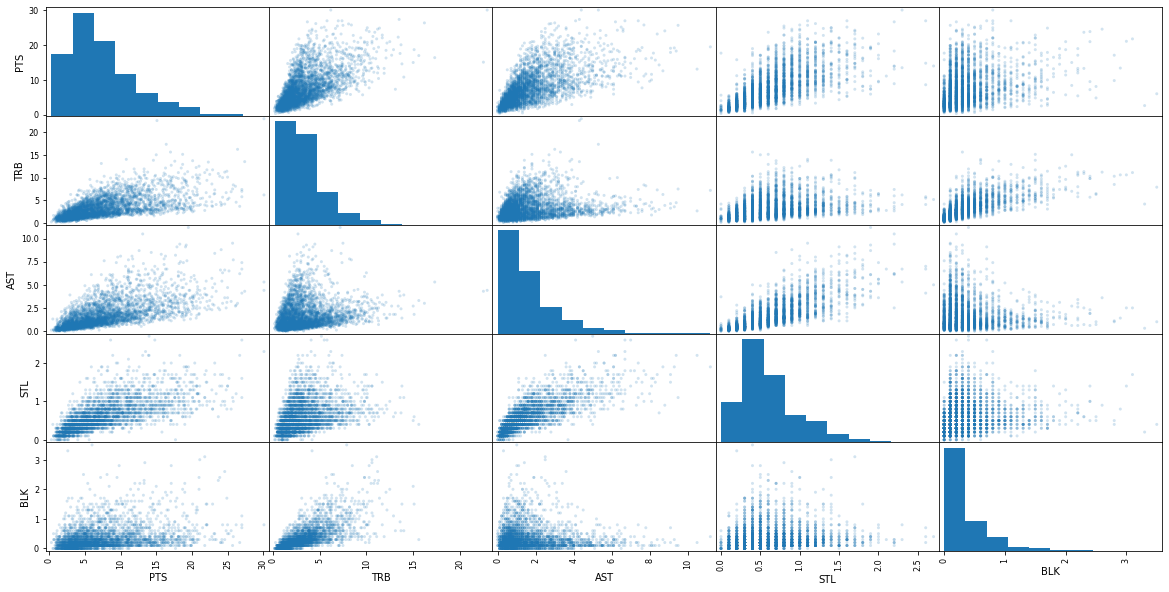

In [23]:
pd.plotting.scatter_matrix(all_player_stats[['PTS', 'TRB', 'AST', 'STL', 'BLK']], alpha=0.2, figsize = (20,10));

## Random Forest Baseline Model with 5 Main Stats

In [24]:
# check how many rows have NaNs
is_NaN = all_player_stats[['PTS', 'TRB', 'AST', 'STL', 'BLK']].isnull()
row_has_NaN = is_NaN.any(axis=1)
row_has_NaN.sum()

566

In [25]:
# percent we would be dropping
(566/all_player_stats.shape[0]) * 100

15.770409584842573

Dropping NaNs and try creating a base model with the 5 main stats first then move forward from there

In [26]:
# dropping rows with NaNs
no_nan_main_stats = all_player_stats[['PTS', 'TRB', 'AST', 'STL', 'BLK','Pos','Player','Target','Num_Pos']].copy().dropna(axis=0)

X = no_nan_main_stats[['PTS', 'TRB', 'AST', 'STL', 'BLK']]
y = no_nan_main_stats['Target']

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 23, stratify = y)


In [27]:
rf = RandomForestClassifier().fit(X_train,y_train)
print(f'train accuracy: {cross_val_score(rf,X_train,y_train,cv=5).mean()} | test accuracy: {rf.score(X_test,y_test)}')

train accuracy: 0.6389533391509676 | test accuracy: 0.6148760330578512


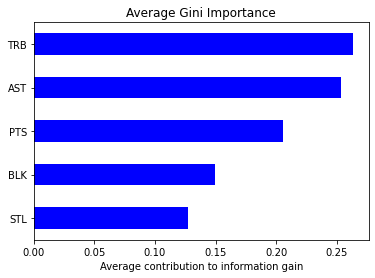

In [28]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=X_train.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh',
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

The areas that the model is misclassifying make sense given a lot of Centers are interchangeable with Power Forwards, same with Shooting Guards and Small Forwards - these classifications would be interchangeable if done by hand as well - in this case, what would be the defining features that distinguish a Center from a Power Forward. What feature can we add into our model to inform the model better?

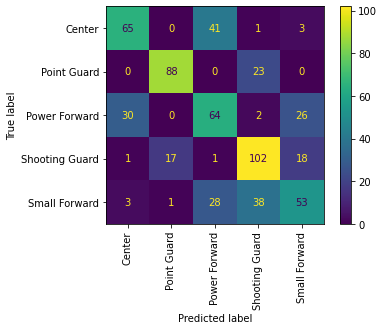

In [29]:
plot_confusion_matrix(rf,X_test,y_test,xticks_rotation='vertical');

In [30]:
print(classification_report(y_test, rf.predict(X_test), digits=3))

                precision    recall  f1-score   support

        Center      0.657     0.591     0.622       110
   Point Guard      0.830     0.793     0.811       111
 Power Forward      0.478     0.525     0.500       122
Shooting Guard      0.614     0.734     0.669       139
 Small Forward      0.530     0.431     0.475       123

      accuracy                          0.615       605
     macro avg      0.622     0.615     0.615       605
  weighted avg      0.617     0.615     0.613       605



#### Investigate who we are getting wrong

In [31]:
y_predicted = rf.predict(X_test)
test_with_player_names = pd.concat([X_test,pd.DataFrame(all_player_stats[['Player','Target','Num_Pos']])],axis =1, join = 'inner')
actual_predicted = pd.concat([test_with_player_names.reset_index(),pd.DataFrame(data=y_predicted, columns = ['Predicted'])],axis = 1)
misclassified = actual_predicted[actual_predicted['Target']!=actual_predicted['Predicted']]
c_pf = misclassified[(misclassified['Target']=='Center') | (misclassified['Target']=='Power Forward')]
sg_sf = misclassified[(misclassified['Target']=='Shooting Guard') | (misclassified['Target']=='Small Forward')]

In [32]:
single_position_misclassification = (misclassified['Num_Pos'].value_counts()[0]/test_with_player_names['Num_Pos'].value_counts()[0])
multiple_position_misclassification = (misclassified['Num_Pos'].value_counts()[1]/test_with_player_names['Num_Pos'].value_counts()[1])
print(f'misclassified those that were assigned one position: {round(single_position_misclassification*100)}%')
print(f'misclassified those that were assigned multiple positions: {round(multiple_position_misclassification*100)}%')

misclassified those that were assigned one position: 36%
misclassified those that were assigned multiple positions: 42%


How is our model currently categorizing players based on the metrics?

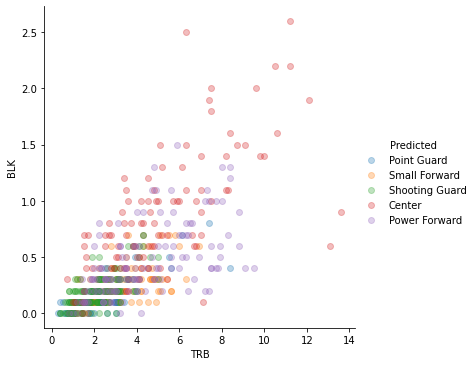

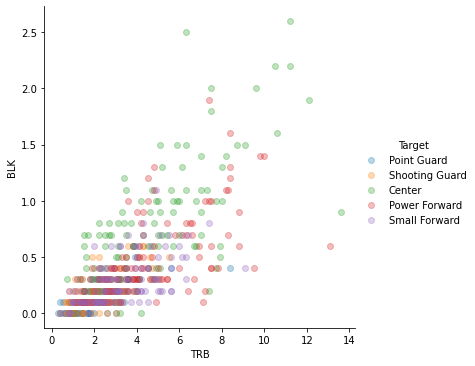

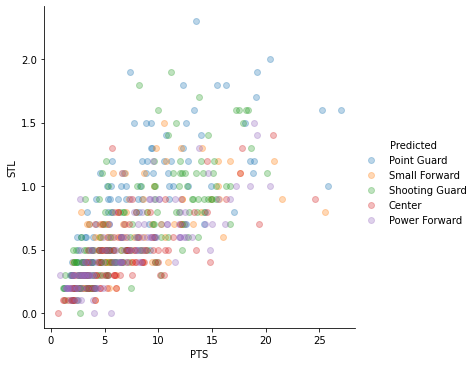

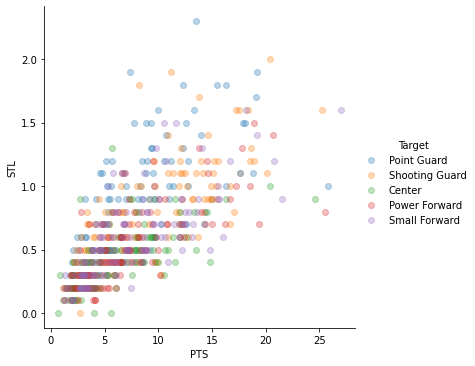

In [33]:
seaborn.lmplot(x='TRB',y='BLK', data=actual_predicted,hue='Predicted', fit_reg =False, scatter_kws = {'alpha': .3})
seaborn.lmplot(x='TRB',y='BLK', data=actual_predicted,hue='Target', fit_reg =False, scatter_kws = {'alpha': .3})
seaborn.lmplot(x='PTS',y='STL', data=actual_predicted,hue='Predicted', fit_reg =False, scatter_kws = {'alpha': .3})
seaborn.lmplot(x='PTS',y='STL', data=actual_predicted,hue='Target', fit_reg =False, scatter_kws = {'alpha': .3});

The areas that are mixing up our Centers/Power Forwards are pretty intuitive in terms of where they are overlapping and where the model is misclassifying. i.e. Centers/Power Forwards are traditionally the bigger men on the court and have higher blocks and rebounds vs Shooting Guard/ Power Forwards are smaller and tend to do better in points and assists. Will need more features to inform the model.

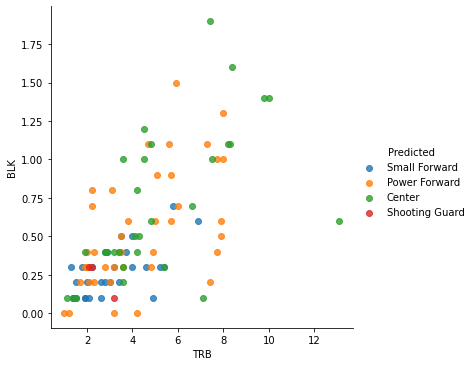

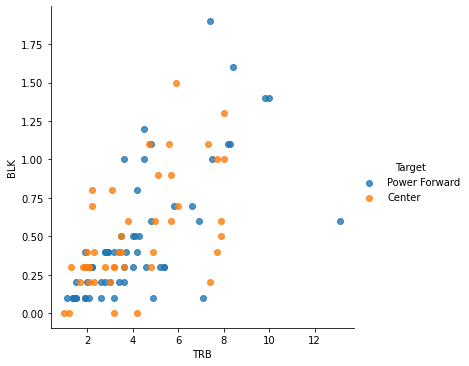

In [34]:
seaborn.lmplot(x='TRB',y='BLK', data=c_pf,hue='Predicted', fit_reg =False)
seaborn.lmplot(x='TRB',y='BLK', data=c_pf,hue='Target', fit_reg =False);

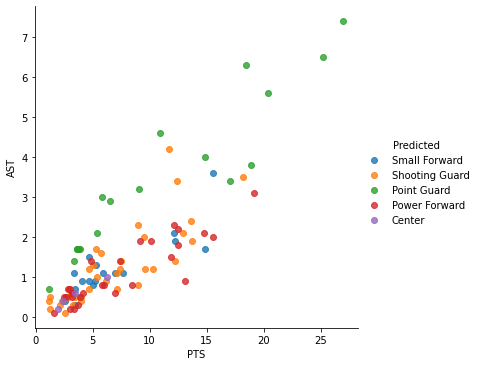

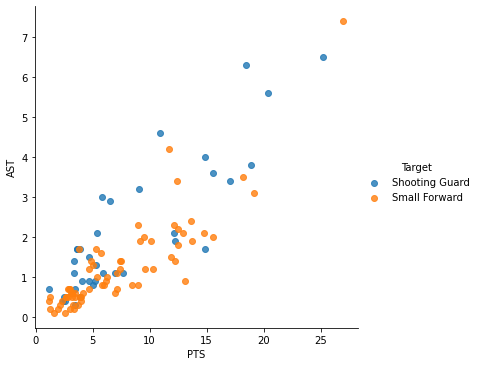

In [35]:
seaborn.lmplot(x='PTS',y='AST', data=sg_sf,hue='Predicted', fit_reg =False);
seaborn.lmplot(x='PTS',y='AST', data=sg_sf,hue='Target', fit_reg =False);

Try adding in the bool column (1-multiple positions, 0-single position) to see if that is telling of anything

In [36]:
X2 = no_nan_main_stats[['PTS', 'TRB', 'AST', 'STL', 'BLK','Num_Pos']]
y2 = no_nan_main_stats['Target']

# split data into training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.20, random_state = 23, stratify = y2)

The boolean column did not inform anything new - performance is similar with or without the added column 

In [37]:
rf2 = RandomForestClassifier().fit(X_train2,y_train2)
print(f'train accuracy: {cross_val_score(rf2,X_train2,y_train2,cv=5).mean()} | test accuracy cross val: {rf2.score(X_test2,y_test2)}')

train accuracy: 0.6401989973136217 | test accuracy cross val: 0.6247933884297521


In [38]:
print(classification_report(y_test2, rf2.predict(X_test2), digits=3))

                precision    recall  f1-score   support

        Center      0.681     0.582     0.627       110
   Point Guard      0.838     0.793     0.815       111
 Power Forward      0.460     0.566     0.507       122
Shooting Guard      0.638     0.748     0.689       139
 Small Forward      0.570     0.431     0.491       123

      accuracy                          0.625       605
     macro avg      0.637     0.624     0.626       605
  weighted avg      0.633     0.625     0.624       605



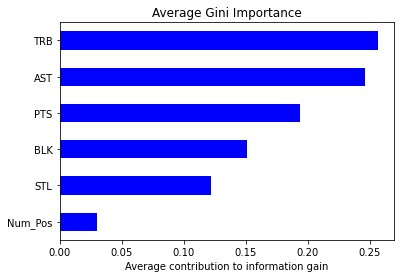

In [39]:
# Plot the feature importance
feat_scores = pd.Series(rf2.feature_importances_,
                           index=X_train2.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh',
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

What are the defining features for each position? What distinguishes someone from being a Center/Power Forward or Shooting Guard/Small Forward - since there is so much overlap between these.

In [40]:
def ROC(model, X_test, y_test):

    Predicted_prob = model.predict_proba(X_test)
    fig, axs = plt.subplots(1,2, figsize=(18.75,10))
    y_test_dummy = pd.get_dummies(y_test).values
    labels = ['Power Forward', 'Center', 'Point Guard', 'Shooting Guard',
       'Small Forward']
    for i in range(5):
        # ROC Curve
        fpr,tpr,thresholds = roc_curve(y_test_dummy[:,i],Predicted_prob[:,i])
        axs[0].plot(fpr,tpr,lw=3,label=labels[i])#,color=colors[i])
        axs[0].plot([0,1],[0,1],color='k',ls='--')
        axs[0].set_xlabel('False Positive Rate')
        axs[0].set_ylabel('True Positive Rate')
        axs[0].legend()
        axs[0].set_title('ROC Curve')
        # Precision-Recall Curve
        precision,recall,thresholds = precision_recall_curve(y_test_dummy[:,i],Predicted_prob[:,i])
        axs[1].plot(recall,precision,label=labels[i])#,color=colors[i])
        axs[1].set_xlabel('Recall')
        axs[1].set_ylabel('Precision')
        axs[1].set_title('Precision-Recall Curve')
        axs[1].legend() 

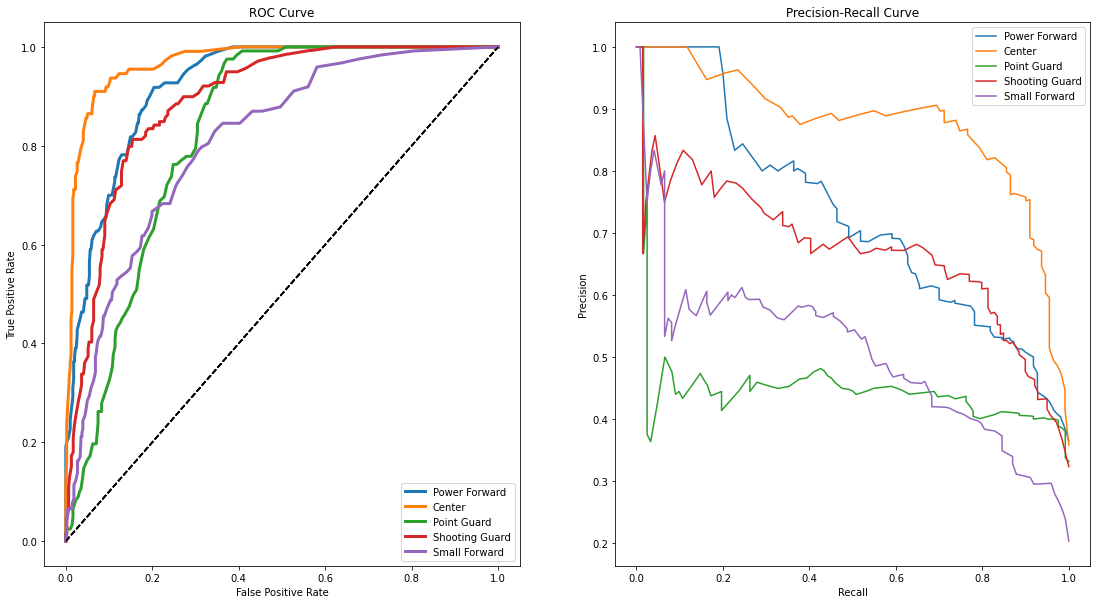

In [41]:
ROC(rf, X_test, y_test)

Points were pretty high up on the gini importance - given that there are different types of field goals that can be made (2 points/3 points) it might be informative to add in the different field goal attempts. Since the big guys typically play more in the paint and the vs the smaller guys play around the perimeter. However, we do need to keep in mind that the idea of that the league didn't adopt the 3-pointer until 1979--Magic Johnson and Larry Bird's rookie season.

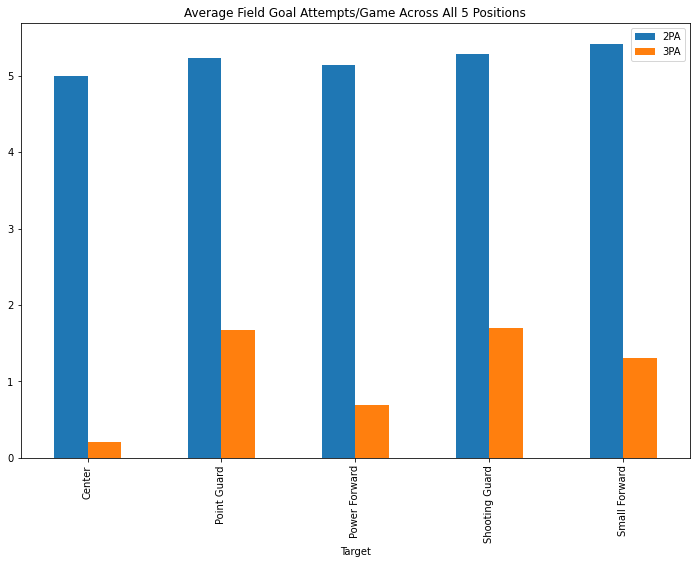

In [42]:
field_goals = summary[['2PA', '3PA']]
field_goals.plot(kind='bar', figsize = (12, 8), title='Average Field Goal Attempts/Game Across All 5 Positions');

Not a huge disparity between 2PAs across the 5 positions unlike 3PAs, which might be more telling. Assuming NaNs are of players from prior to 1979 before the adoption of 3 pointers - changing the NaNs to 0. 

In [43]:
nan_to_zero_threes = all_player_stats[['PTS', 'TRB', 'AST', 'STL', 'BLK','Pos','Player','Target','3PA','2PA']].copy()
nan_to_zero_threes['3PA'].replace({np.NaN: 0}, inplace = True)
nan_to_zero_threes.dropna(axis=0,inplace=True)

In [44]:
X3 = nan_to_zero_threes[['PTS', 'TRB', 'AST', 'STL', 'BLK','2PA','3PA']]
y3 = nan_to_zero_threes['Target']

# split data into training and testing
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size = 0.20, random_state = 23, stratify = y3)

In [45]:
rf3 = RandomForestClassifier().fit(X_train3,y_train3)
print(f'train accuracy: {cross_val_score(rf3,X_train3,y_train3,cv=5).mean()} | test accuracy cross val: {rf3.score(X_test3,y_test3)}')

train accuracy: 0.6253333333333333 | test accuracy cross val: 0.6341030195381883


In [46]:
print(classification_report(y_test3, rf3.predict(X_test3), digits=3))

                precision    recall  f1-score   support

        Center      0.636     0.680     0.657       103
   Point Guard      0.859     0.802     0.829       106
 Power Forward      0.500     0.474     0.487       116
Shooting Guard      0.639     0.669     0.654       127
 Small Forward      0.559     0.559     0.559       111

      accuracy                          0.634       563
     macro avg      0.639     0.637     0.637       563
  weighted avg      0.635     0.634     0.634       563



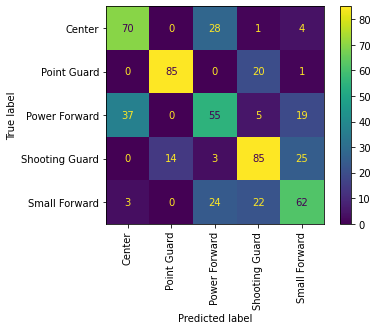

In [47]:
plot_confusion_matrix(rf3,X_test3,y_test3,xticks_rotation='vertical');

Model performance didn't really change compared to the above. Lets try dropping those with NaNs for 3PA to compare!

In [145]:
drop_nan_threes = all_player_stats[['PTS', 'TRB', 'AST', 'STL', 'BLK','Pos','Player','Target','3PA','2PA']].copy()
drop_nan_threes.dropna(axis=0, inplace = True)

In [146]:
X4 = drop_nan_threes[['PTS', 'TRB', 'AST', 'STL', 'BLK','2PA','3PA']]
y4 = drop_nan_threes['Target']

# split data into training and testing
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4, test_size = 0.20, random_state = 23, stratify = y4)

In [147]:
rf4 = RandomForestClassifier().fit(X_train4,y_train4)
print(f'train accuracy: {cross_val_score(rf4,X_train4,y_train4,cv=5).mean()} | test accuracy cross val: {rf4.score(X_test4,y_test4)}')

train accuracy: 0.6452914798206277 | test accuracy cross val: 0.6164874551971327


In [148]:
print(classification_report(y_test4, rf4.predict(X_test4), digits=3))

                precision    recall  f1-score   support

        Center      0.657     0.657     0.657       102
   Point Guard      0.840     0.752     0.794       105
 Power Forward      0.492     0.522     0.506       115
Shooting Guard      0.605     0.748     0.669       127
 Small Forward      0.518     0.394     0.448       109

      accuracy                          0.616       558
     macro avg      0.622     0.615     0.615       558
  weighted avg      0.618     0.616     0.614       558



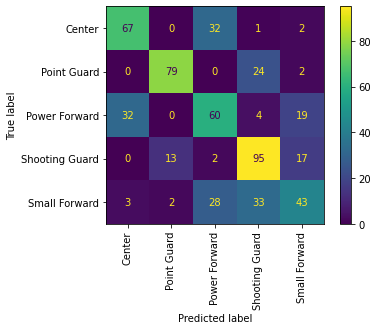

In [149]:
plot_confusion_matrix(rf4,X_test4,y_test4,xticks_rotation='vertical');

Haven't tried predicting on all targets yet - let's try and compare and get the gini importance. Use standard scaler because some metrics are percentages and will be on different scales

In [52]:
all_features = all_player_stats.dropna(axis=0)

X5 = all_features.drop(['Pos','Target','Num_Pos','Player'],axis=1)
y5 = all_features['Target']

# split data into training and testing
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5, test_size = 0.20, random_state = 23, stratify = y5)

scaler = StandardScaler().fit(X_train5)
X_train5_scaled = scaler.transform(X_train5)
X_test5_scaled = scaler.transform(X_test5)

rf5 = RandomForestClassifier().fit(X_train5,y_train5)
print(f'train accuracy: {cross_val_score(rf5,X_train5,y_train5,cv=5).mean()} | test accuracy cross val: {rf5.score(X_test5,y_test5)}')


train accuracy: 0.635 | test accuracy cross val: 0.632


In [53]:
print(classification_report(y_test5, rf5.predict(X_test5), digits=3))

                precision    recall  f1-score   support

        Center      0.639     0.654     0.646        81
   Point Guard      0.802     0.770     0.786       100
 Power Forward      0.550     0.545     0.547       101
Shooting Guard      0.606     0.703     0.651       118
 Small Forward      0.571     0.480     0.522       100

      accuracy                          0.632       500
     macro avg      0.634     0.630     0.630       500
  weighted avg      0.632     0.632     0.630       500



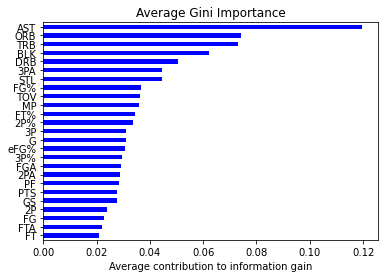

In [54]:
# Plot the feature importance
feat_scores = pd.Series(rf5.feature_importances_,
                           index=X_train5.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh',
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [88]:
top_seven_gini = all_player_stats[['AST','ORB','TRB','BLK','DRB','STL','3PA','Player','Pos','Target']]
top_seven_gini = top_seven_gini.copy().dropna(axis=0,inplace=True)

X6 = all_features.drop(['Pos','Target','Player'],axis=1)
y6 = all_features['Target']

# split data into training and testing
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6, test_size = 0.20, random_state = 23, stratify = y6)

rf6 = RandomForestClassifier().fit(X_train6,y_train6)
print(f'train accuracy: {cross_val_score(rf6,X_train6,y_train6,cv=5).mean()} | test accuracy cross val: {rf6.score(X_test6,y_test6)}')


train accuracy: 0.6385000000000001 | test accuracy cross val: 0.624


In [56]:
print(classification_report(y_test6, rf6.predict(X_test6), digits=3))

                precision    recall  f1-score   support

        Center      0.628     0.605     0.616        81
   Point Guard      0.822     0.830     0.826       100
 Power Forward      0.515     0.515     0.515       101
Shooting Guard      0.628     0.686     0.656       118
 Small Forward      0.505     0.460     0.482       100

      accuracy                          0.622       500
     macro avg      0.620     0.619     0.619       500
  weighted avg      0.619     0.622     0.620       500



## Logistic Regression

Try the same thing that we did with rf with logistic regression 

train accuracy: 0.6612844994267919 | test accuracy cross val: 0.6760330578512397


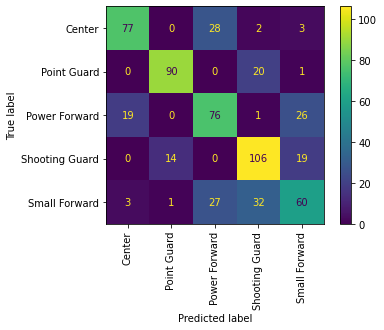

In [57]:
# 5 main stats - dropped NaNs 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression(max_iter = 400).fit(X_train,y_train)
lr_predicted = lr.predict(X_test)
plot_confusion_matrix(lr,X_test,y_test,xticks_rotation='vertical')
print(f'train accuracy: {cross_val_score(lr,X_train,y_train,cv=5).mean()} | test accuracy cross val: {accuracy_score(y_test,lr_predicted)}');

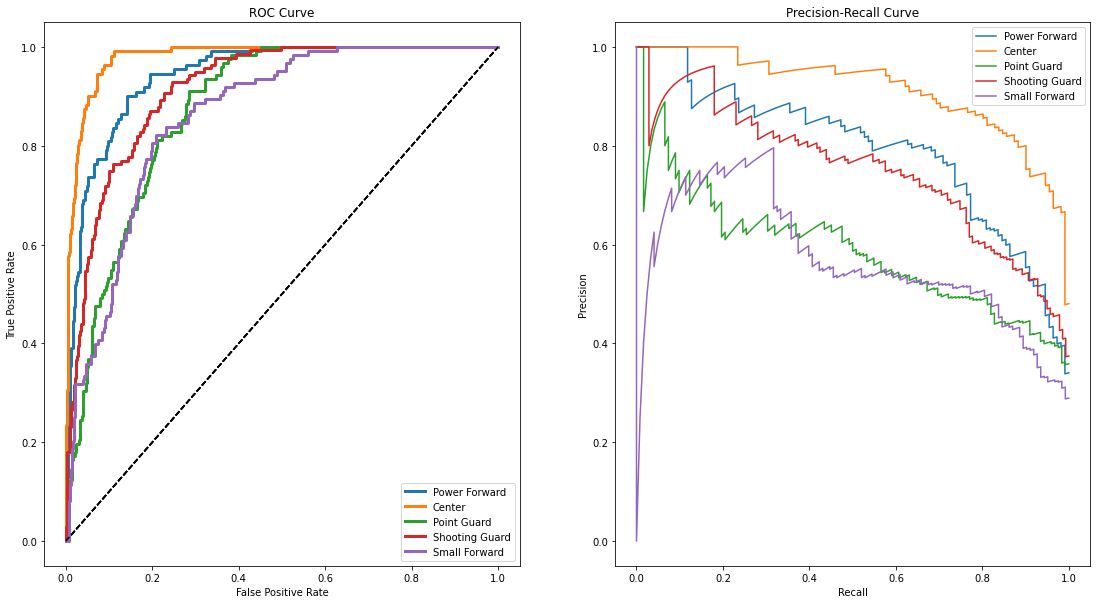

In [58]:
ROC(lr, X_test, y_test)

train accuracy: 0.6697777777777778 | test accuracy cross val: 0.6802841918294849


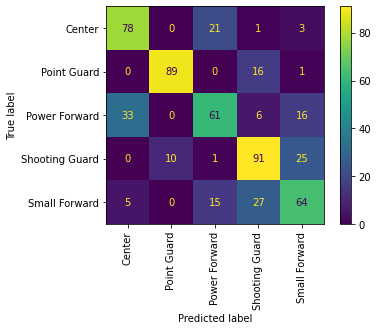

In [157]:
scaler = StandardScaler().fit(X_test3)
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

lr = LogisticRegression(max_iter = 400).fit(X_train3,y_train3)
lr_predicted = lr.predict(X_test3)
plot_confusion_matrix(lr,X_test3,y_test3,xticks_rotation='vertical')
print(f'train accuracy: {cross_val_score(lr,X_train3,y_train3,cv=5).mean()} | test accuracy cross val: {accuracy_score(y_test3,lr_predicted)}');

In [60]:
print(classification_report(y_test3, lr.predict(X_test3), digits=3))

                precision    recall  f1-score   support

        Center      0.672     0.757     0.712       103
   Point Guard      0.899     0.840     0.868       106
 Power Forward      0.622     0.526     0.570       116
Shooting Guard      0.645     0.717     0.679       127
 Small Forward      0.587     0.577     0.582       111

      accuracy                          0.680       563
     macro avg      0.685     0.683     0.682       563
  weighted avg      0.682     0.680     0.679       563



Try using the top 7 Gini Importance Features for Logistic Regression

train accuracy: 0.6869999999999999 | test accuracy cross val: 0.652


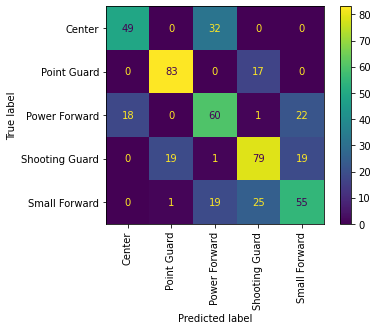

In [115]:
scaler = StandardScaler().fit(X_test6)
X_train6 = scaler.transform(X_train6)
X_test6 = scaler.transform(X_test6)


lr = LogisticRegression(max_iter = 400).fit(X_train6,y_train6)
lr_predicted = lr.predict(X_test6)
plot_confusion_matrix(lr,X_test6,y_test6,xticks_rotation='vertical')
print(f'train accuracy: {cross_val_score(lr,X_train6,y_train6,cv=5).mean()} | test accuracy cross val: {accuracy_score(y_test6,lr_predicted)}');

Try all features - need to scale because there are some values that are meant to be percentages (different scales)

train accuracy: 0.6839999999999999 | test accuracy cross val: 0.654


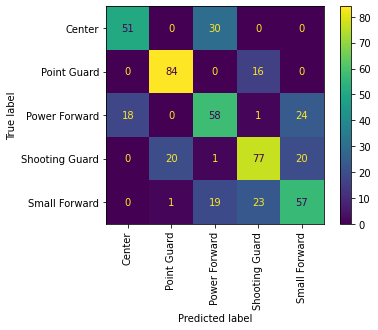

In [62]:
# dropping rows with NaNs
all_stats_no_nans = all_player_stats.copy().dropna(axis=0)

X_all_stats = all_stats_no_nans.drop(['Player','Pos','Target','Num_Pos'],axis=1)
y_all_stats = all_stats_no_nans['Target']

X_train_all_stats, X_test_all_stats, y_train_all_stats, y_test_all_stats = train_test_split(X_all_stats,y_all_stats, test_size = 0.20, random_state = 23, stratify = y_all_stats)

scaler = StandardScaler().fit(X_train_all_stats)
X_train_all_stats_scaled = scaler.transform(X_train_all_stats)
X_test_all_stats_scaled = scaler.transform(X_test_all_stats)


lr_all = LogisticRegression(max_iter = 400).fit(X_train_all_stats_scaled,y_train_all_stats)
lr_all_predicted = lr_all.predict(X_test_all_stats_scaled)
plot_confusion_matrix(lr_all,X_test_all_stats_scaled,y_test_all_stats,xticks_rotation='vertical')
print(f'train accuracy: {cross_val_score(lr_all,X_train_all_stats_scaled,y_train_all_stats,cv=5).mean()} | test accuracy cross val: {accuracy_score(y_test_all_stats,lr_all_predicted)}');

Seems like logistic regression is perfoming the best so far - currently we are just dropping rows with NaN values but we don't have much data to begin with - so lets try imputing with KNN

In [63]:
for feature in all_player_stats.columns:
    # count number of rows with missing values
    n_miss = all_player_stats[feature].isnull().sum()
    perc = n_miss / all_player_stats.shape[0] * 100
    print(f'{feature}, Missing: {n_miss} ({perc})')

Player, Missing: 0 (0.0)
Pos, Missing: 0 (0.0)
G, Missing: 0 (0.0)
GS, Missing: 931 (25.940373363053777)
MP, Missing: 77 (2.145444413485651)
FG, Missing: 0 (0.0)
FGA, Missing: 0 (0.0)
FG%, Missing: 0 (0.0)
3P, Missing: 768 (21.3987183059348)
3PA, Missing: 768 (21.3987183059348)
3P%, Missing: 952 (26.525494566731677)
2P, Missing: 692 (19.281136806910002)
2PA, Missing: 692 (19.281136806910002)
2P%, Missing: 692 (19.281136806910002)
eFG%, Missing: 692 (19.281136806910002)
FT, Missing: 0 (0.0)
FTA, Missing: 0 (0.0)
FT%, Missing: 3 (0.08358874338255781)
ORB, Missing: 538 (14.990247979938701)
DRB, Missing: 538 (14.990247979938701)
TRB, Missing: 56 (1.560323209807746)
AST, Missing: 0 (0.0)
STL, Missing: 566 (15.770409584842573)
BLK, Missing: 566 (15.770409584842573)
TOV, Missing: 690 (19.225410977988297)
PF, Missing: 0 (0.0)
PTS, Missing: 0 (0.0)
Target, Missing: 0 (0.0)
Num_Pos, Missing: 0 (0.0)


In [64]:
all_player_stats[all_player_stats['2PA'].isnull()]

Player                              Pos      G  GS    MP  \
1       Zaid Abdul-Aziz         Center and Power Forward  505.0 NaN  21.8   
11         Don Ackerman                      Point Guard   28.0 NaN   7.9   
13            Bud Acton                    Small Forward   23.0 NaN   8.5   
25         Rick Adelman                      Point Guard  462.0 NaN  22.6   
38          Gary Alcorn                           Center   78.0 NaN  10.8   
...                 ...                              ...    ...  ..   ...   
4472  Charlie Yelverton                   Shooting Guard   69.0 NaN  17.8   
4486      Max Zaslofsky                   Shooting Guard  373.0 NaN  28.3   
4487       Zeke Zawoluk  Power Forward and Small Forward  179.0 NaN  19.7   
4489        Dave Zeller                      Point Guard   61.0 NaN   4.6   
4502          Bill Zopf                      Point Guard   53.0 NaN   7.5   

       FG   FGA    FG%  3P  3PA  ...  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
1     3.5   8.2  0.428 NaN  NaN  ...  5.4  8.0  1.2  0.6  1.0  0.9  2.2   9.0   
11    0.5   2.3  0.222 NaN  NaN  ...  NaN  0.5  0.8  NaN  NaN  NaN  1.5   1.5   
13    1.3   3.2  0.392 NaN  NaN  ...  NaN  2.0  0.5  NaN  NaN  NaN  1.5   3.3   
25    3.0   7.2  0.415 NaN  NaN  ...  1.1  2.4  3.5  0.9  0.1  NaN  2.1   7.7   
38    1.3   4.5  0.293 NaN  NaN  ...  NaN  4.2  0.3  NaN  NaN  NaN  2.2   3.3   
...   ...   ...    ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
4472  3.0   7.7  0.389 NaN  NaN  ...  NaN  2.9  1.2  NaN  NaN  NaN  2.1   7.9   
4486  4.6  13.2  0.350 NaN  NaN  ...  NaN  2.8  2.3  NaN  NaN  NaN  2.4  13.2   
4487  2.2   5.9  0.372 NaN  NaN  ...  NaN  4.1  1.2  NaN  NaN  NaN  2.5   6.8   
4489  0.6   1.7  0.353 NaN  NaN  ...  NaN  0.4  1.0  NaN  NaN  NaN  0.6   1.5   
4502  0.9   2.5  0.363 NaN  NaN  ...  NaN  0.9  1.4  NaN  NaN  NaN  0.6   2.2   

              Target  Num_Pos  
1             Center        1  
11       Point Guard        0  
13     Small Forward        0  
25       Point Guard        0  
38            Center        0  
...              ...      ...  
4472  Shooting Guard        0  
4486  Shooting Guard        0  
4487   Power Forward        1  
4489     Point Guard        0  
4502     Point Guard        0  

[692 rows x 29 columns]

When scraping the data - I knew there would be NaNs since some stats were not available for some players (it seems like it mostly was for the earlier seasons in the NBA) - we don't have dates for the data so I cannot filter it out by date. And other NaNs make sense i.e. why some players have NaNs for 3 point attempts since 3 pointers weren't a thing prior to 1979 but looking at some examples where 2 point attempts were NaNs we can see that field goal attempts were not - that means those player simply just didn't have field goal attempt break downs (goes back to the first point). 

In [124]:
def pick_k_lr(og_df, X,y,ns,model_features):
    
    columns = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    
    
    for n in ns:
        imputer = KNNImputer(n_neighbors=n).fit(X)
        X_trans = imputer.transform(X)

        predicted_nans = pd.DataFrame(data = X_trans,columns=columns)
        df_to_concat = og_df.copy()
        df_to_concat.drop(columns,axis=1,inplace=True)
        final_df = pd.concat([df_to_concat.reset_index(),predicted_nans],axis=1)

        X_model = final_df[model_features]
        y_model = final_df['Target']

        X_train, X_test, y_train, y_test = train_test_split(X_model,y_model, test_size = 0.20, random_state = 23, stratify = y_model)
        
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        


        lr = LogisticRegression(max_iter = 200, C=100).fit(X_train,y_train)
        lr_predicted = lr.predict(X_test)

        print(f'train accuracy: {cross_val_score(lr,X_train,y_train,cv=5).mean()} | test accuracy cross val: {accuracy_score(y_test,lr_predicted)}');
        plot_confusion_matrix(lr,X_test,y_test,xticks_rotation='vertical')
        ROC(lr, X_test, y_test)

train accuracy: 0.6280024238751705 | test accuracy cross val: 0.6225626740947076
train accuracy: 0.6381033176791395 | test accuracy cross val: 0.6337047353760445
train accuracy: 0.6381021057415543 | test accuracy cross val: 0.6392757660167131
train accuracy: 0.6328756249053173 | test accuracy cross val: 0.6434540389972145
train accuracy: 0.6360103014694742 | test accuracy cross val: 0.6350974930362117
train accuracy: 0.6394952279957582 | test accuracy cross val: 0.637883008356546
train accuracy: 0.6360121193758521 | test accuracy cross val: 0.637883008356546
train accuracy: 0.6300911983032874 | test accuracy cross val: 0.6323119777158774
train accuracy: 0.6349662172398122 | test accuracy cross val: 0.6476323119777159


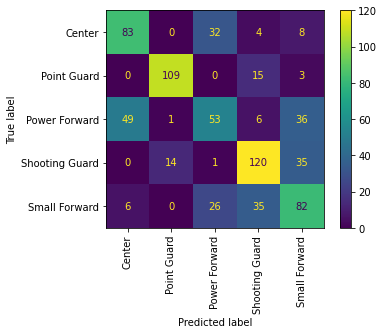

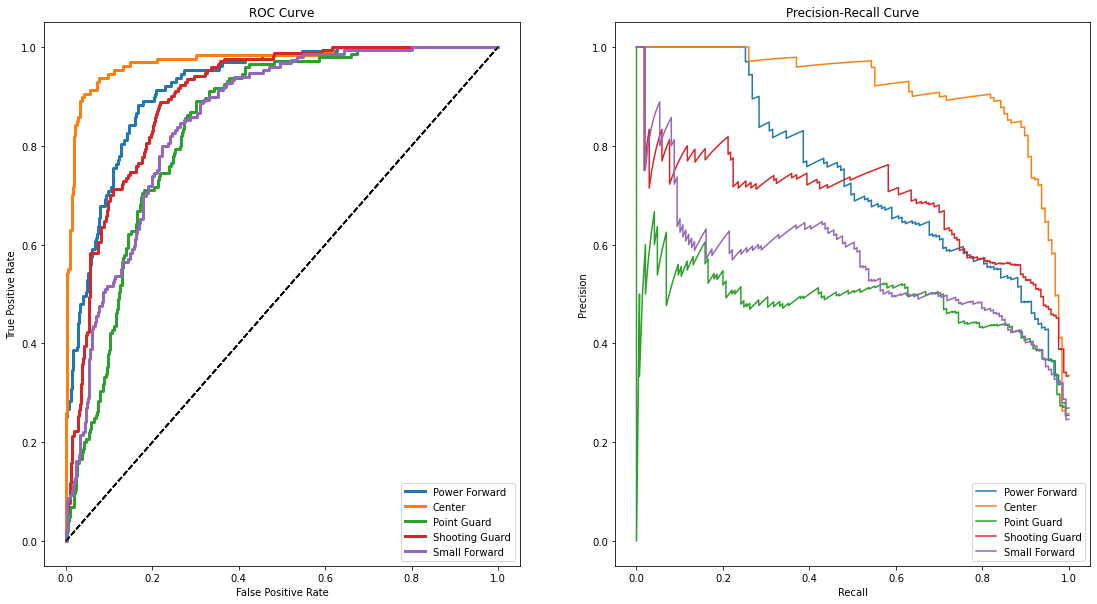

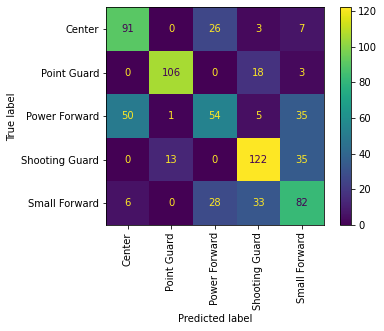

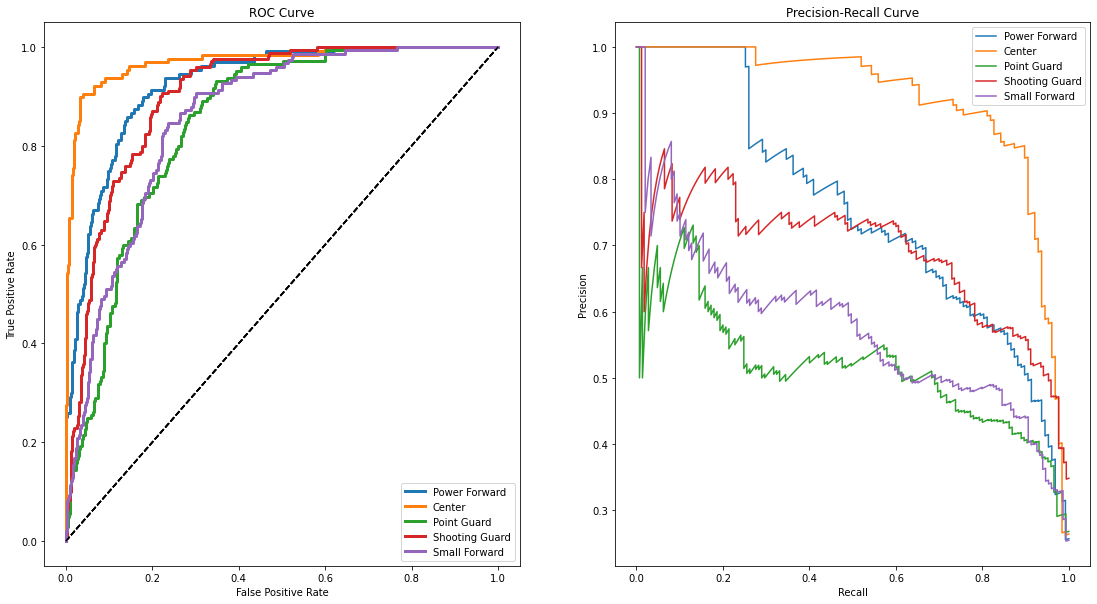

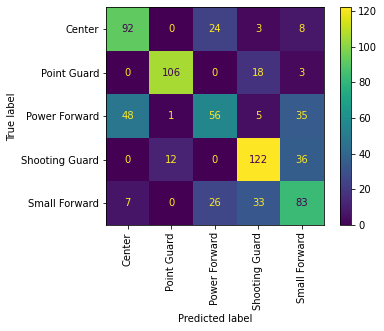

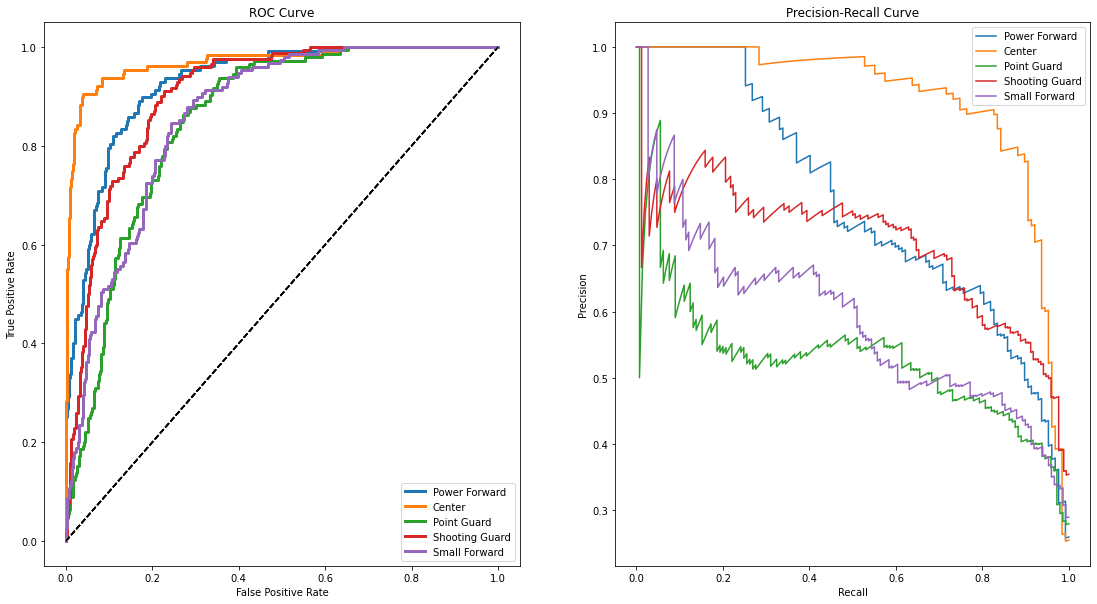

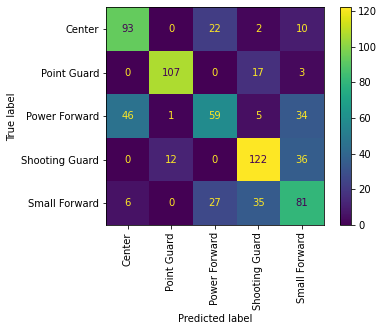

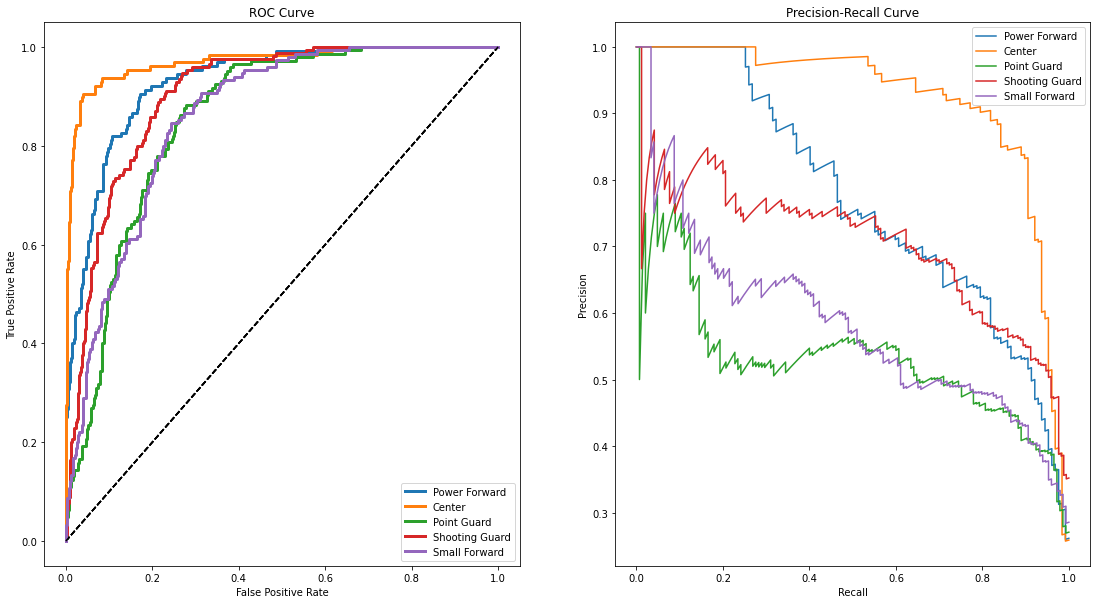

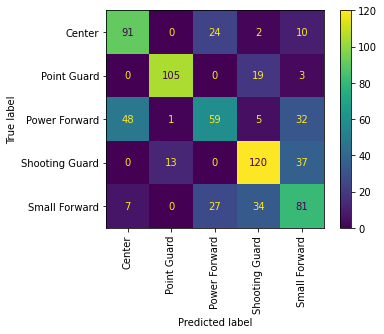

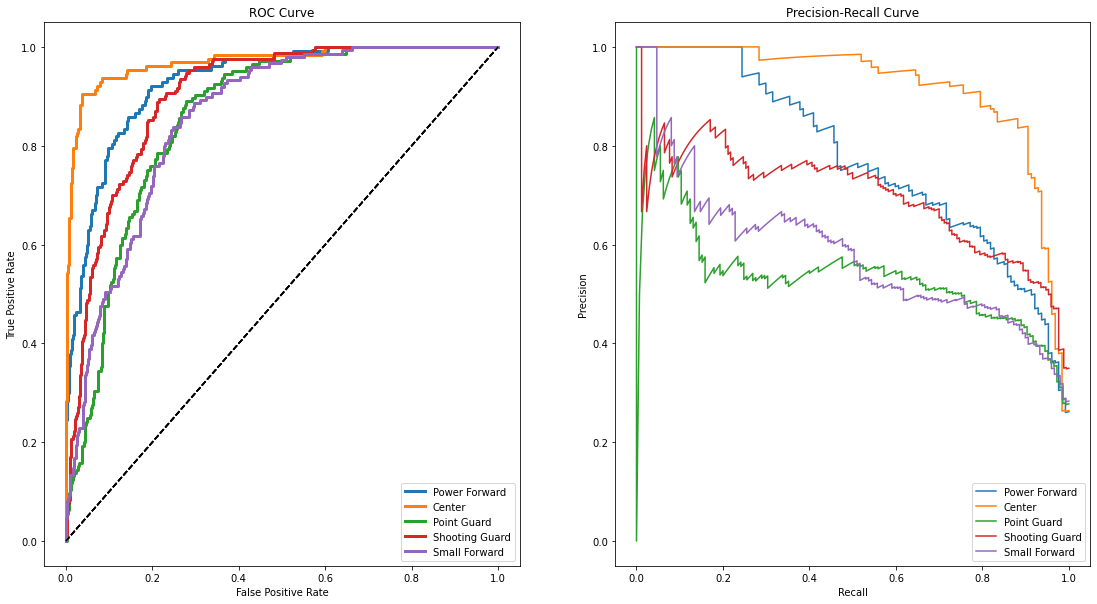

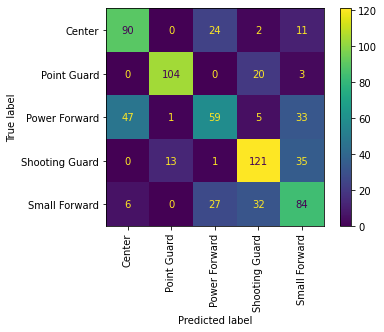

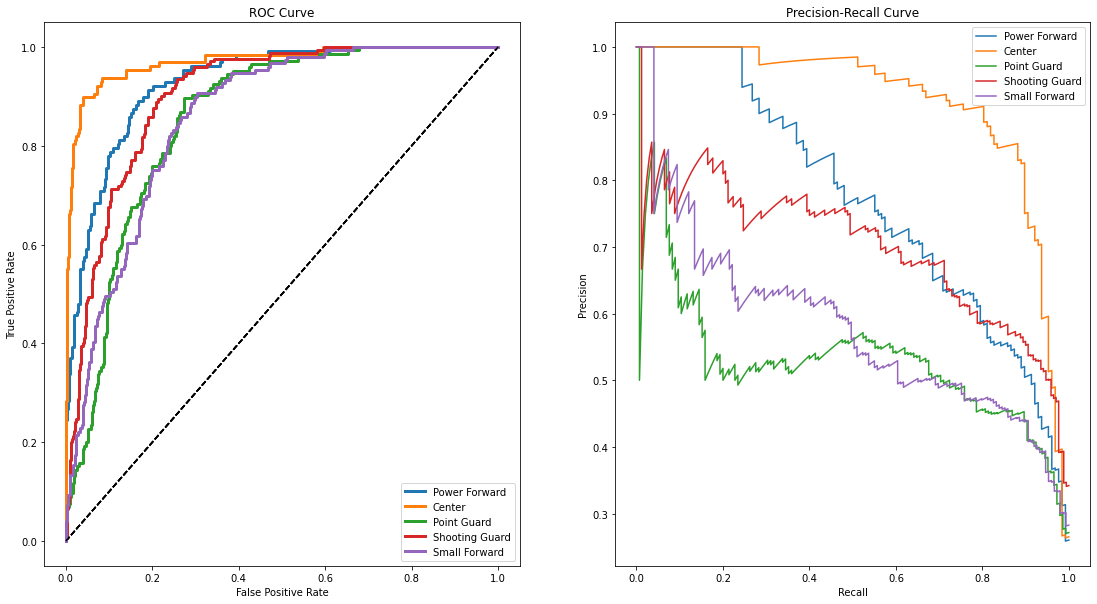

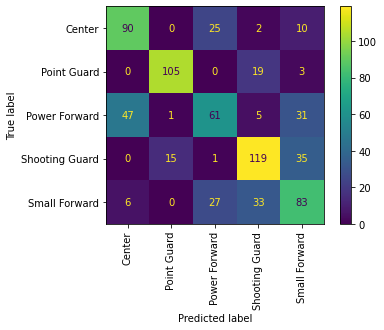

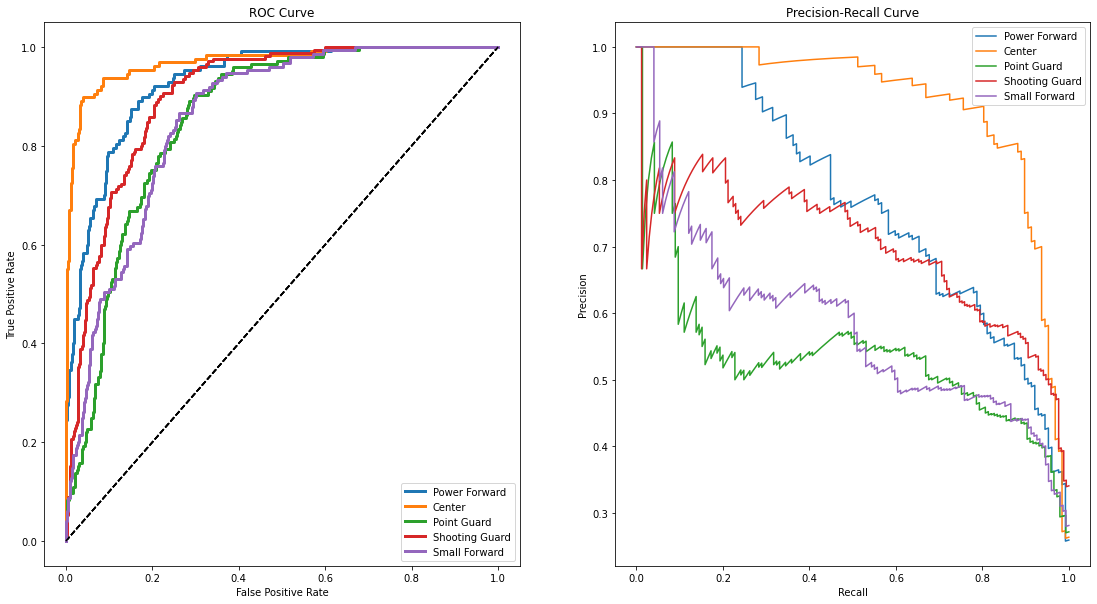

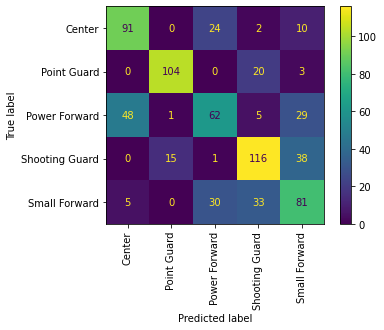

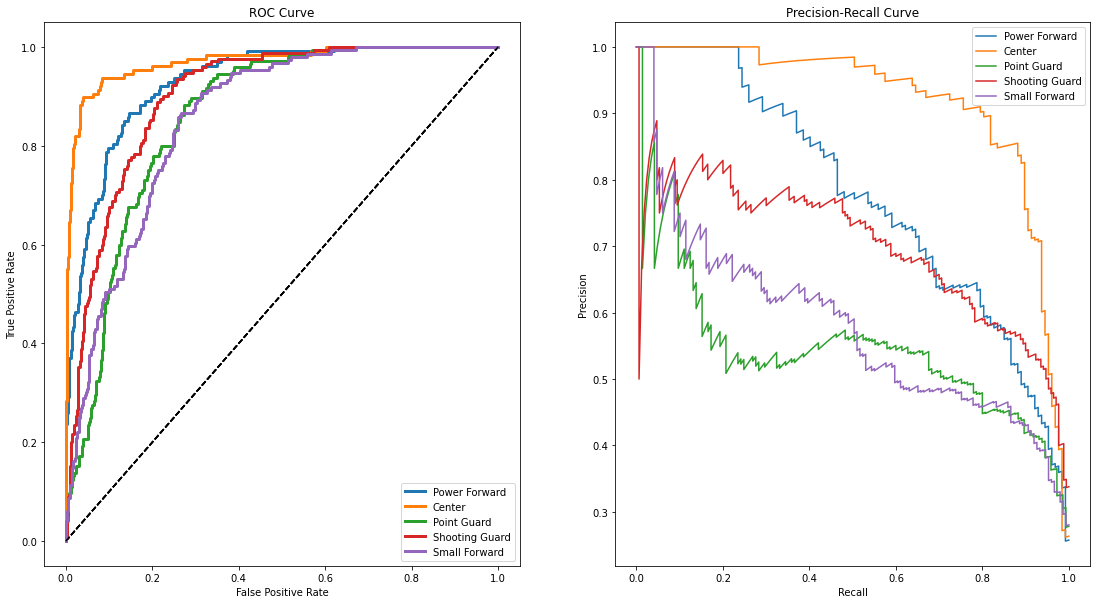

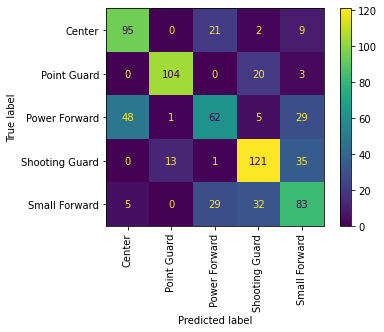

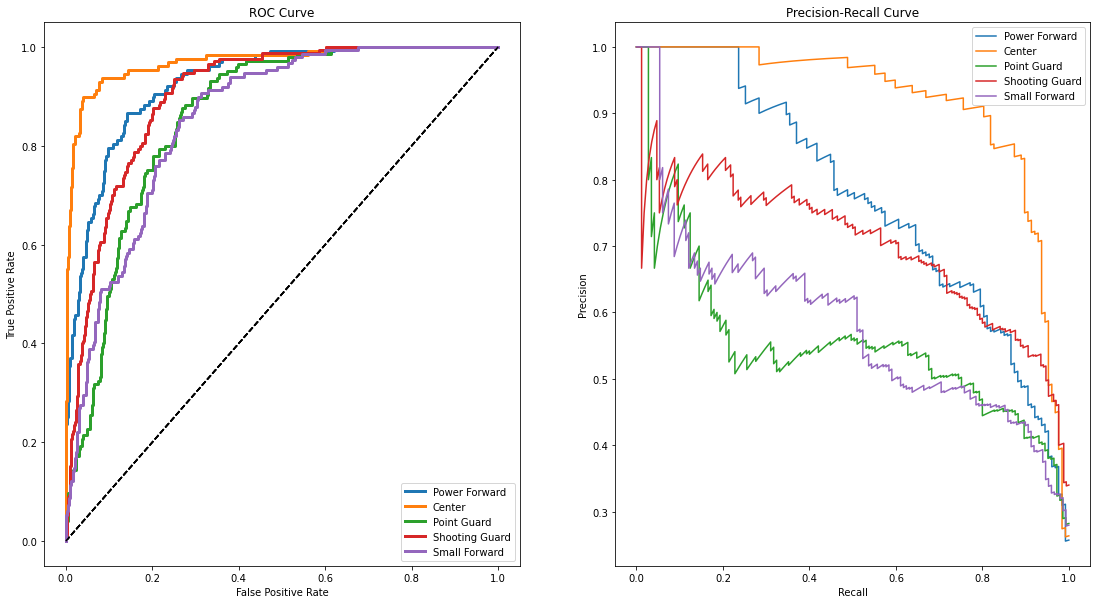

In [84]:
pick_k_lr(all_player_stats,all_player_stats.drop(['Pos','Num_Pos','Target','Player'],axis=1),all_player_stats['Target'],[i for i in range(1,10)],['PTS', 'TRB', 'AST', 'STL', 'BLK','2PA','3PA','ORB','DRB'])

Try the same thing for Random Forest - then pick the best model to tune if possible

In [122]:
def pick_k_rf(og_df, X,y,ns,model_features):
    
    columns = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    
    
    for n in ns:
        imputer = KNNImputer(n_neighbors=n).fit(X)
        X_trans = imputer.transform(X)

        predicted_nans = pd.DataFrame(data = X_trans,columns=columns)
        df_to_concat = og_df.copy()
        df_to_concat.drop(columns,axis=1,inplace=True)
        final_df = pd.concat([df_to_concat.reset_index(),predicted_nans],axis=1)

        X_model = final_df[model_features]
        y_model = final_df['Target']

        X_train, X_test, y_train, y_test = train_test_split(X_model,y_model, test_size = 0.20, random_state = 23, stratify = y_model)
        
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        rf = RandomForestClassifier(max_depth= 15, max_features= 3, min_samples_leaf= 5, min_samples_split= 8, n_estimators= 100).fit(X_train,y_train)
        rf_predicted = rf.predict(X_test)

        print(f'train accuracy: {cross_val_score(lr,X_train,y_train,cv=5).mean()} | test accuracy cross val: {accuracy_score(y_test,rf_predicted)}');
        plot_confusion_matrix(rf,X_test,y_test,xticks_rotation='vertical')
        ROC(rf, X_test, y_test)

train accuracy: 0.6363569156188456 | test accuracy cross val: 0.5988857938718662
train accuracy: 0.6374070595364338 | test accuracy cross val: 0.6016713091922006
train accuracy: 0.6374046356612635 | test accuracy cross val: 0.6100278551532033
train accuracy: 0.6342687471595212 | test accuracy cross val: 0.6142061281337048
train accuracy: 0.6342693531283139 | test accuracy cross val: 0.6239554317548747
train accuracy: 0.6339227389789426 | test accuracy cross val: 0.6155988857938719
train accuracy: 0.6325296167247386 | test accuracy cross val: 0.616991643454039
train accuracy: 0.63392213301015 | test accuracy cross val: 0.616991643454039
train accuracy: 0.6311358885017422 | test accuracy cross val: 0.6058495821727019


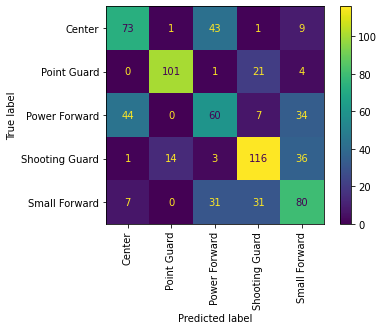

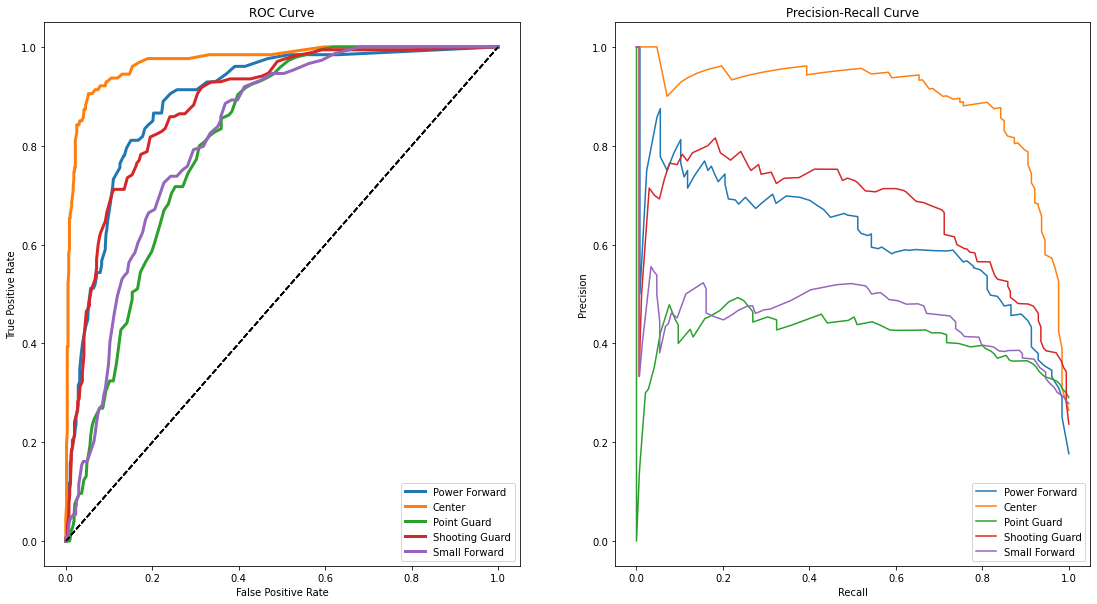

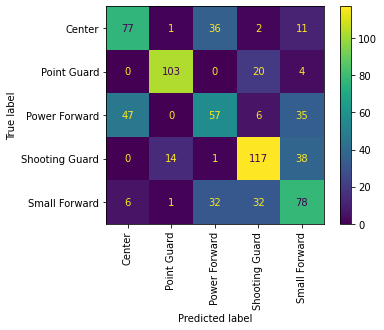

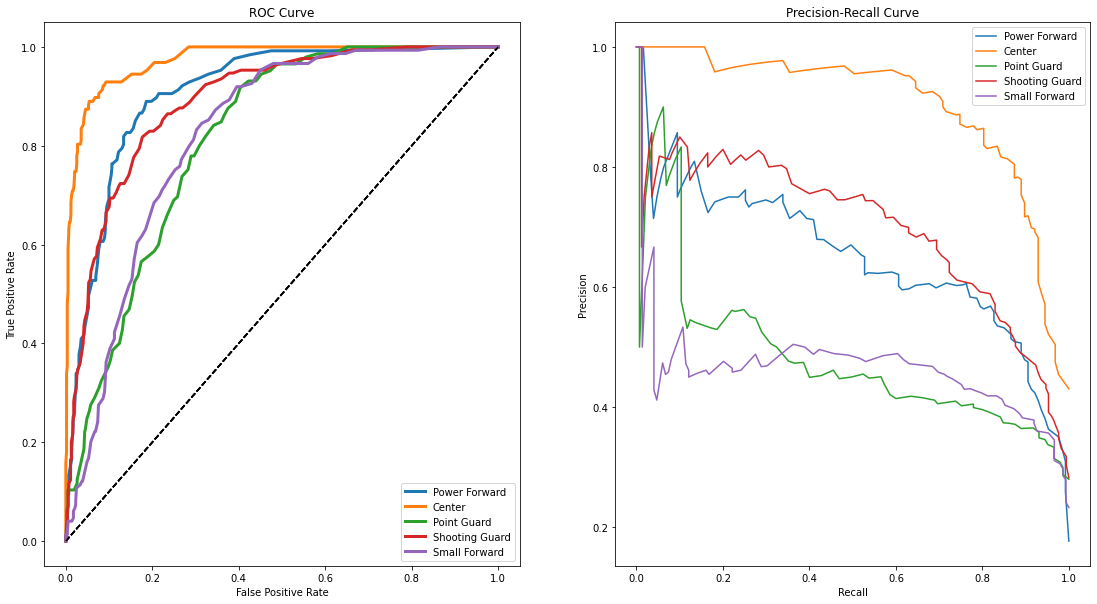

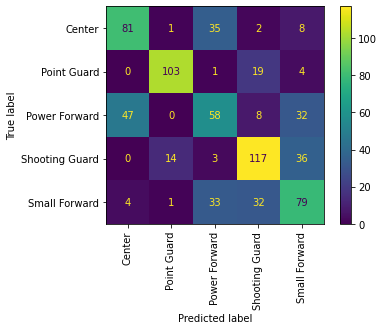

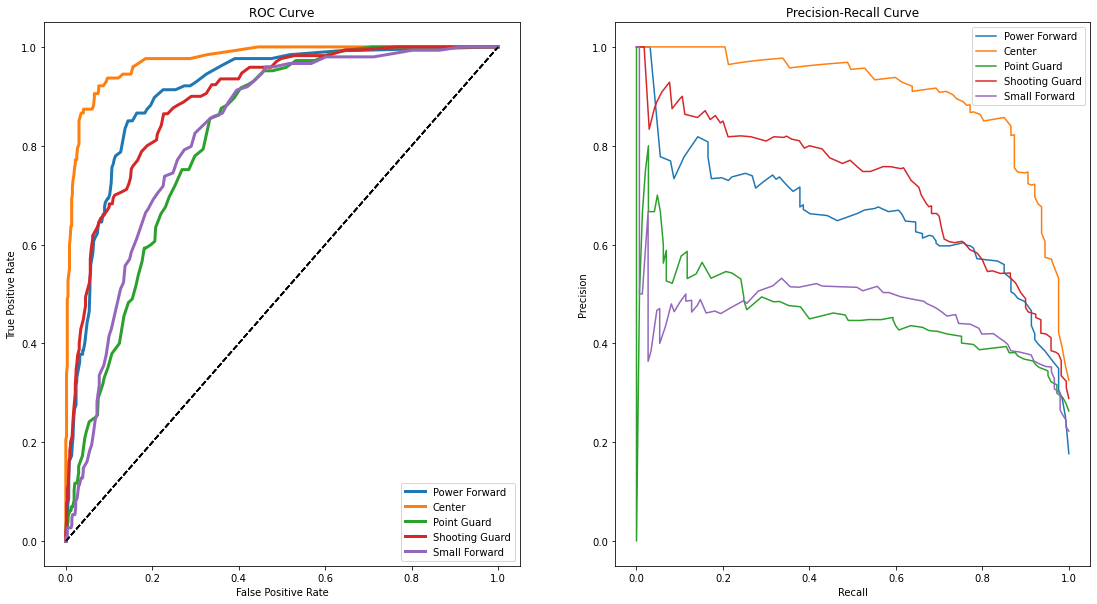

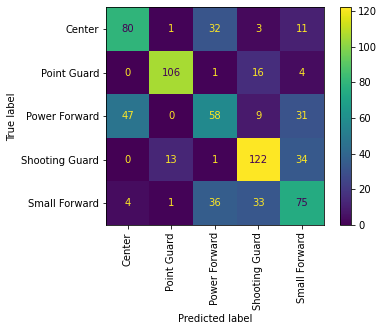

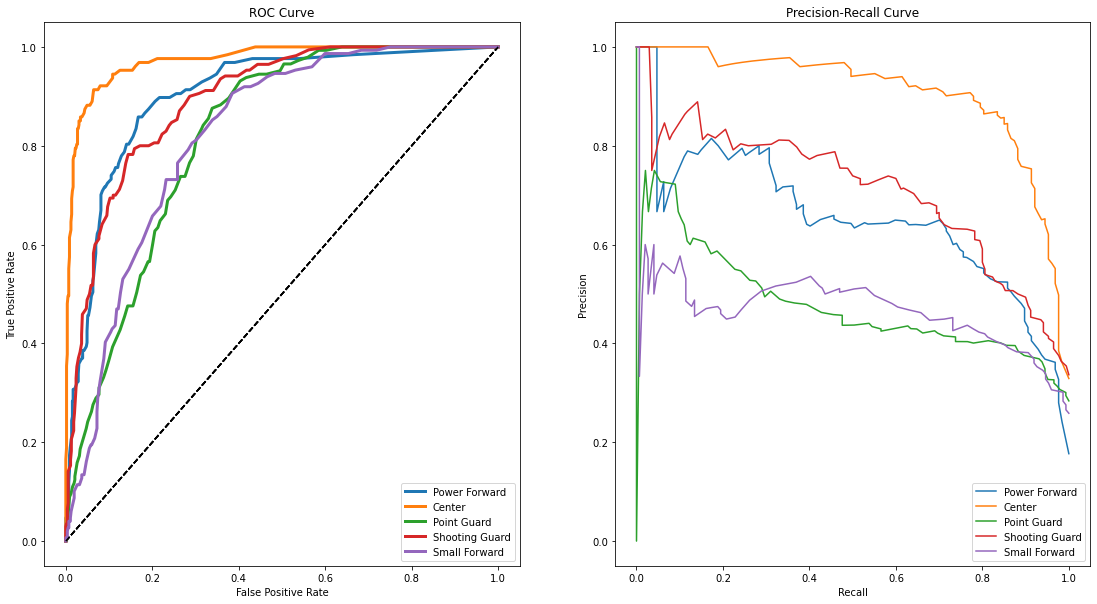

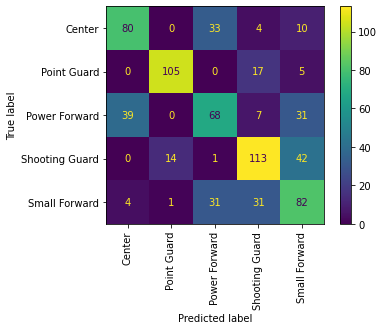

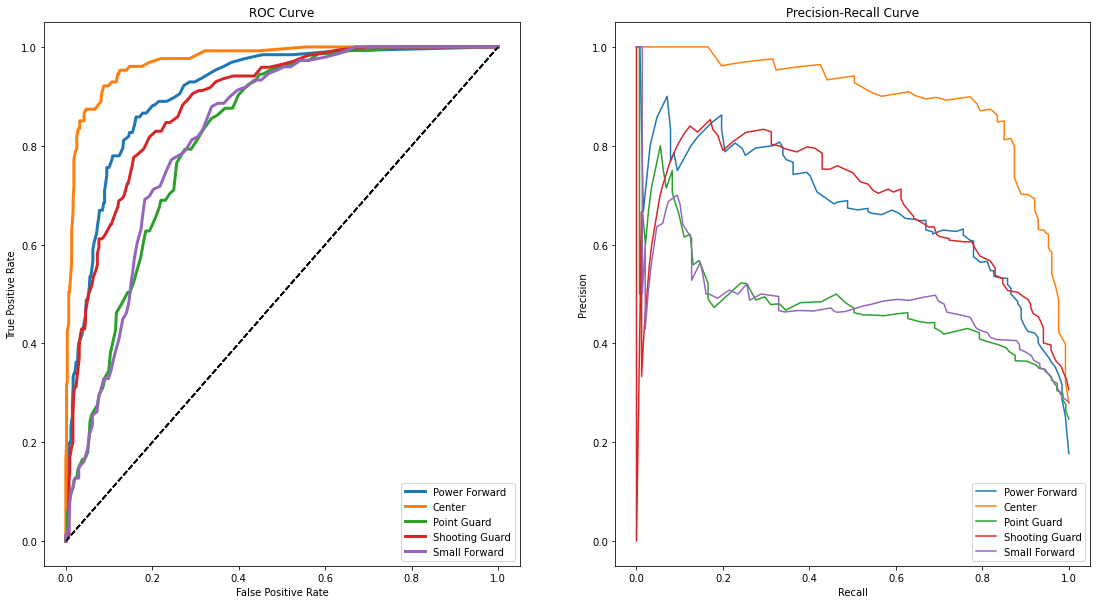

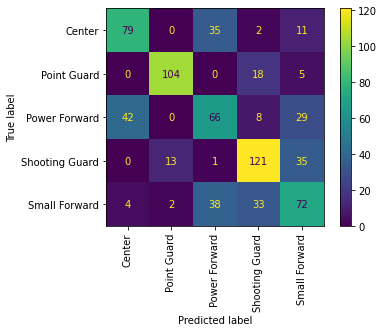

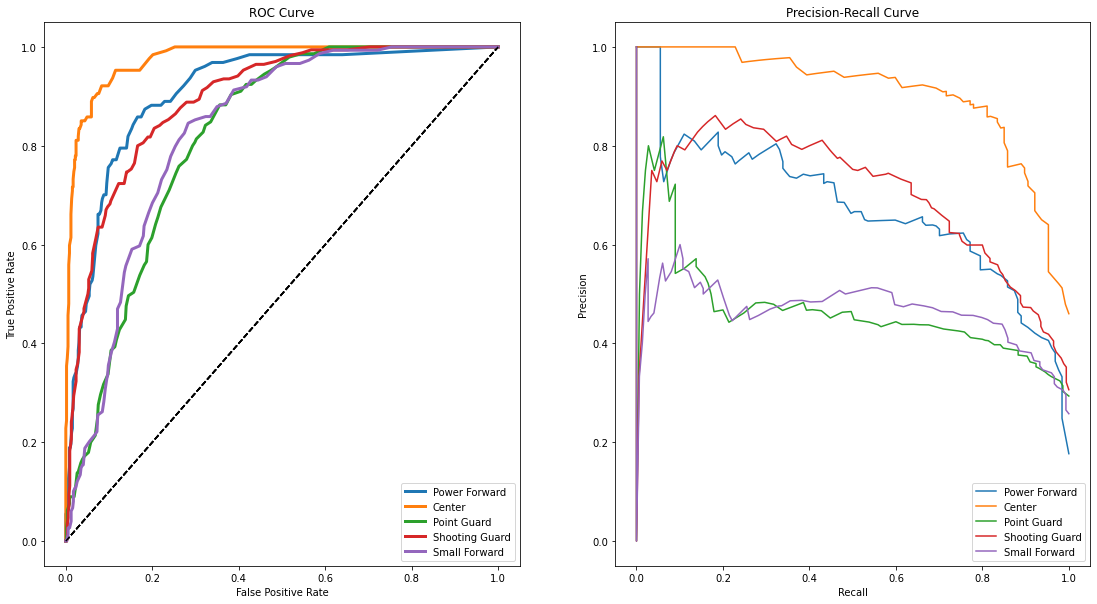

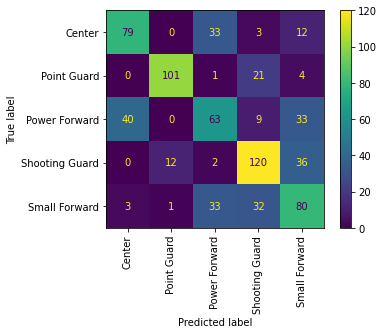

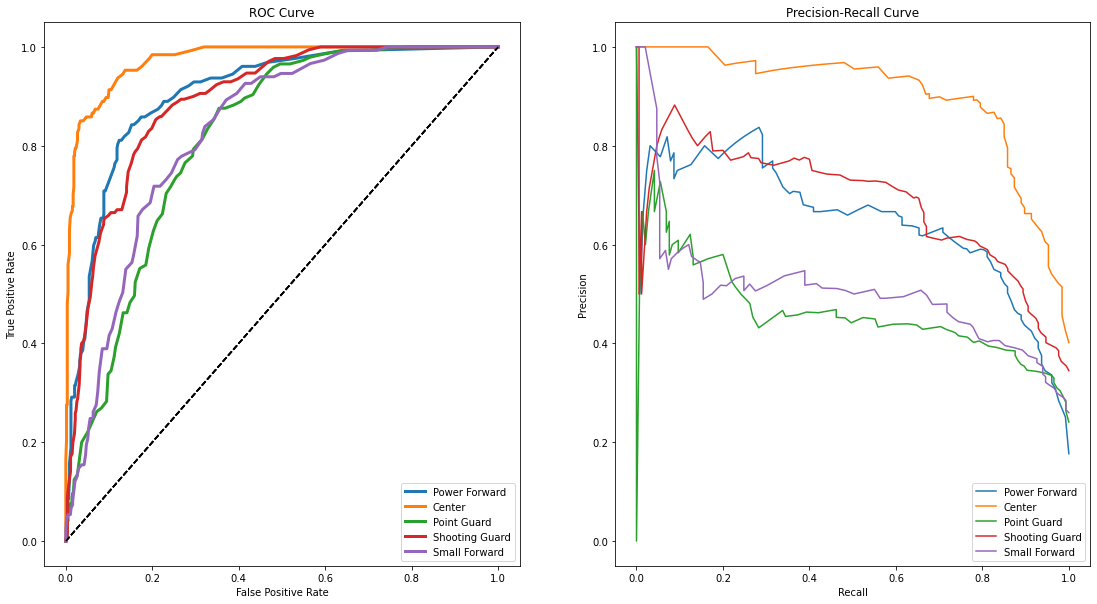

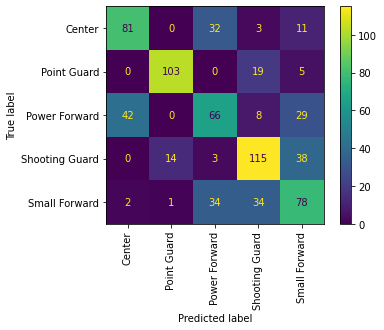

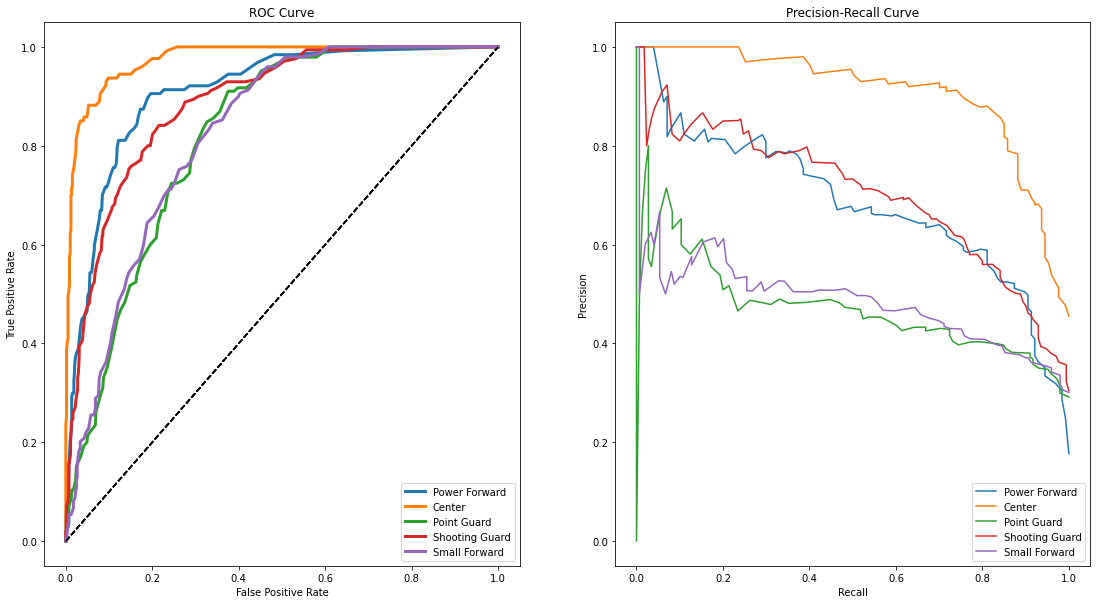

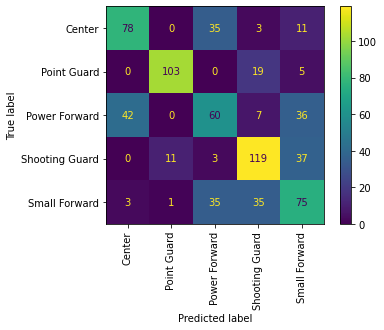

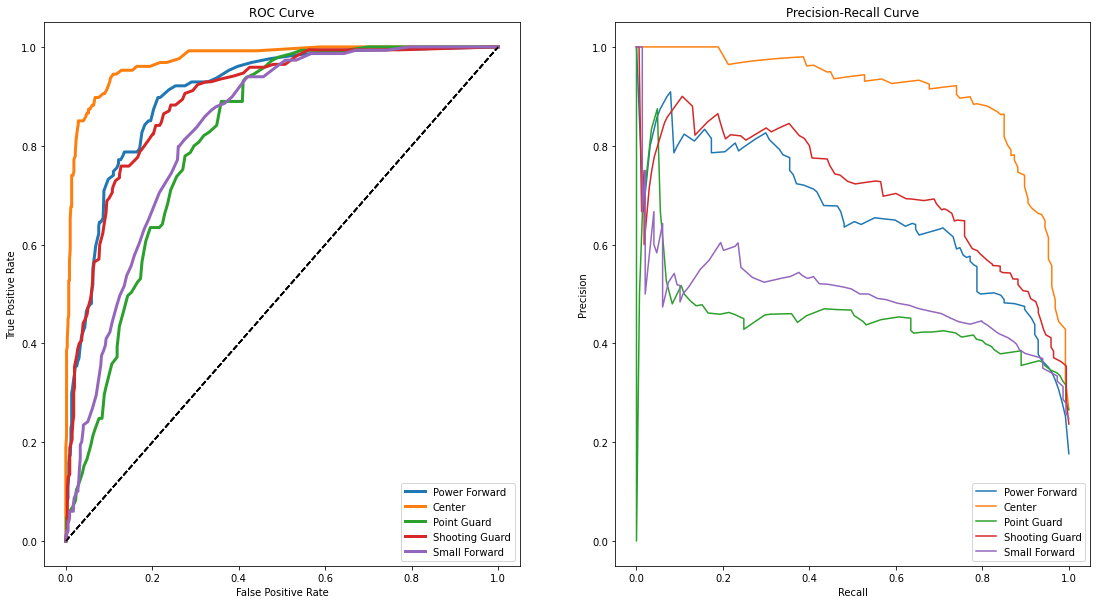

In [68]:
pick_k_rf(all_player_stats,all_player_stats.drop(['Pos','Num_Pos','Target','Player'],axis=1),all_player_stats['Target'],[i for i in range(1,10)],['PTS', 'TRB', 'AST', 'STL', 'BLK','2PA','3PA'])

Before we hypertune any model - one last endeavor, are we having issues with predicting targets given our current information or is it because some players can be better described as hybrids and therefore those who were categorized as multiple positions should truly be done so? Especially since there is so much overlap between certain positions. Let's try using our previous targets but cleaned up to make sure they're consistent (some are same positions, different orders)

In [69]:
# replace the values that have '/' for easier split and cleaning i.e. (center/forward)
all_player_stats['Pos'].replace(['Center/Forward','Guard/Forward','Forward/Guard','Forward/Center'],\
                                ['Center and Power Forward','Shooting Guard and Small Forward','Small Forward and Shooting Guard','Power Forward and Center'],inplace=True)
# list of sorted and split positions to compare and pull uniques from
list_to_keep_track = []
# list of position combinations pulled from all positions (disregards order)
target2_unique_positions = []
# list of corresponding original positions to their unique combo 
target_index = []
# list of the combos to use for target2 
rename_to = []

for position in all_player_stats['Pos'].unique():
    position = position.replace(',','')
    s  = sorted(position.lower().split())
    list_to_keep_track.append(s)
    
# create a list where each index are indices of corresponding unique positions and each list at those indices contain
# indices where the positions are repeated (regardless of order)
for i,position in enumerate(list_to_keep_track):
    if position not in target2_unique_positions:
        target2_unique_positions.append(position)

for i,pos in enumerate(target2_unique_positions):
    keep_track = []
    for i2, pos2 in enumerate(list_to_keep_track):
        if pos == pos2:
            keep_track.append(i2)
    target_index.append(keep_track)

for lst in target_index:
    index = lst[0]
    rename_to.append(all_player_stats['Pos'].unique()[index])

In [70]:
# update positions to cleaned and unique versions based on the above lists for target2
all_player_stats_w_new_target = all_player_stats.copy()
all_player_stats_w_new_target['Target2'] = all_player_stats_w_new_target['Pos']

for i,lst in enumerate(target_index):
    for index in lst:
        all_player_stats_w_new_target['Target2'].replace([all_player_stats_w_new_target['Pos'].unique()[index]],
                                                         [rename_to[i]],inplace=True)


Updated to have a new target - let's try the same modeling process as above

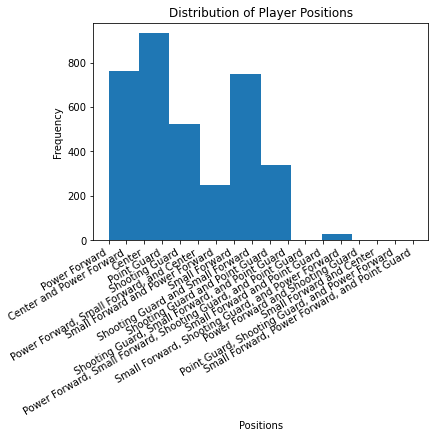

In [71]:
# Positions are pretty evenly distributed
fig,ax = plt.subplots()
ax.hist(all_player_stats_w_new_target['Target2'])
ax.set_xlabel('Positions')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Player Positions')
plt.xticks(rotation=30, ha='right');

In [72]:
all_player_stats_w_new_target['Target2'].value_counts()

Shooting Guard                                                   489
Center                                                           468
Point Guard                                                      463
Small Forward                                                    438
Power Forward                                                    396
Center and Power Forward                                         368
Shooting Guard and Point Guard                                   319
Shooting Guard and Small Forward                                 310
Small Forward and Power Forward                                  248
Power Forward, Small Forward, and Center                          34
Small Forward, Shooting Guard, and Power Forward                  25
Shooting Guard, Small Forward, and Point Guard                    19
Small Forward and Point Guard                                      5
Small Forward and Center                                           2
Power Forward, Small Forward, Shoo

In [73]:
# dropping those with classes fewer than 20 in the class
all_player_stats_w_new_target_filtered = all_player_stats_w_new_target.groupby('Target2').filter(lambda x : len(x)>20)
all_player_stats_w_new_target_filtered

Player                       Pos       G     GS    MP  \
0          Alaa Abdelnaby             Power Forward   256.0   53.0  12.5   
1         Zaid Abdul-Aziz  Center and Power Forward   505.0    NaN  21.8   
2     Kareem Abdul-Jabbar                    Center  1560.0  625.0  36.8   
3      Mahmoud Abdul-Rauf               Point Guard   586.0  336.0  26.7   
4       Tariq Abdul-Wahad            Shooting Guard   236.0  145.0  20.4   
...                   ...                       ...     ...    ...   ...   
4496         George Zídek                    Center   135.0   23.0   9.8   
4499          Paul Zipser             Small Forward    98.0   30.0  17.0   
4500           Ante Žižić                    Center   113.0   27.0  13.4   
4502            Bill Zopf               Point Guard    53.0    NaN   7.5   
4503          Ivica Zubac                    Center   271.0  138.0  17.3   

        FG   FGA    FG%   3P  3PA  ...   TRB  AST  STL  BLK  TOV   PF   PTS  \
0      2.4   4.8  0.502  0.0  0.0  ...   3.3  0.3  0.3  0.3  1.0  1.9   5.7   
1      3.5   8.2  0.428  NaN  NaN  ...   8.0  1.2  0.6  1.0  0.9  2.2   9.0   
2     10.2  18.1  0.559  0.0  0.0  ...  11.2  3.6  0.9  2.6  2.7  3.0  24.6   
3      6.0  13.6  0.442  0.8  2.3  ...   1.9  3.5  0.8  0.1  1.6  1.9  14.6   
4      3.1   7.3  0.417  0.1  0.3  ...   3.3  1.1  0.8  0.4  1.3  2.1   7.8   
...    ...   ...    ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   ...   
4496   1.2   2.9  0.408  0.0  0.0  ...   2.1  0.2  0.1  0.1  0.5  1.8   3.4   
4499   1.7   4.6  0.371  0.7  2.1  ...   2.6  0.8  0.4  0.3  0.8  1.7   4.7   
4500   2.4   4.2  0.581  0.0  0.0  ...   3.9  0.6  0.2  0.4  0.7  1.5   6.0   
4502   0.9   2.5  0.363  NaN  NaN  ...   0.9  1.4  NaN  NaN  NaN  0.6   2.2   
4503   3.1   5.3  0.584  0.0  0.0  ...   6.0  1.0  0.3  0.8  0.9  2.1   7.7   

              Target  Num_Pos                   Target2  
0      Power Forward        0             Power Forward  
1             Center        1  Center and Power Forward  
2             Center        0                    Center  
3        Point Guard        0               Point Guard  
4     Shooting Guard        0            Shooting Guard  
...              ...      ...                       ...  
4496          Center        0                    Center  
4499   Small Forward        0             Small Forward  
4500          Center        0                    Center  
4502     Point Guard        0               Point Guard  
4503          Center        0                    Center  

[3558 rows x 30 columns]

In [74]:
# dropping rows with NaNs
no_nan_main_stats_target2 = all_player_stats_w_new_target_filtered[['PTS', 'TRB', 'AST', 'STL', 'BLK','Pos','Player','Target2','Num_Pos']].copy().dropna(axis=0)

X_target2 = no_nan_main_stats_target2[['PTS', 'TRB', 'AST', 'STL', 'BLK']]
y_target2 = no_nan_main_stats_target2['Target2']

# split data into training and testing
X_train_target2, X_test_target2, y_train_target2, y_test_target2 = train_test_split(X_target2,y_target2, test_size = 0.20, random_state = 23, stratify = y_target2)

In [75]:
rf_target2 = RandomForestClassifier(n_estimators = 500, max_depth = 15).fit(X_train_target2,y_train_target2)
print(f'train accuracy: {cross_val_score(rf_target2,X_train_target2,y_train_target2,cv=5).mean()} | test accuracy: {rf_target2.score(X_test_target2,y_test_target2)}')

train accuracy: 0.42881002087682674 | test accuracy: 0.38731218697829717


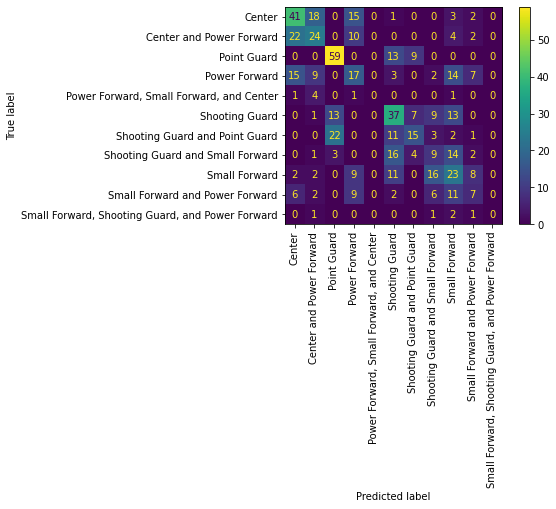

In [76]:
plot_confusion_matrix(rf_target2,X_test_target2,y_test_target2,xticks_rotation='vertical');

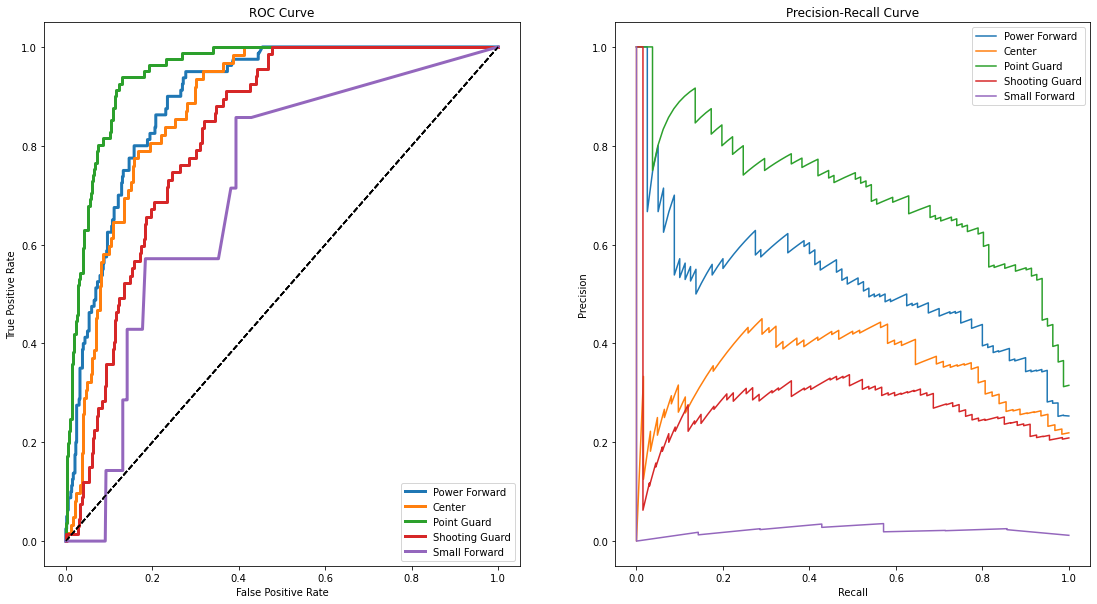

In [77]:
ROC(rf_target2, X_test_target2, y_test_target2)

Changing the targets to be inclusive of "hybrid" positions didn't do any better than the original model with predicting the traditional 5 positions. For those that were hybrid we're still seeing the same areas of misclassification. 

### Hyptertuning our best models so far

Random Forest

In [151]:
param_grid = {
    'max_depth': [5,10,15,20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()
# Instantiate the grid search model
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

rf_cv.fit(X_train4, y_train4)
print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 200}
accuracy : 0.6591928251121076


In [152]:
best_grid = rf_cv.best_estimator_
best_grid.score(X_test4,y_test4)

0.6129032258064516

In [153]:
print(f'train accuracy: {cross_val_score(best_grid,X_train4,y_train4,cv=5).mean()} | test accuracy cross val: {best_grid.score(X_test4,y_test4)}')

train accuracy: 0.6497757847533633 | test accuracy cross val: 0.6129032258064516


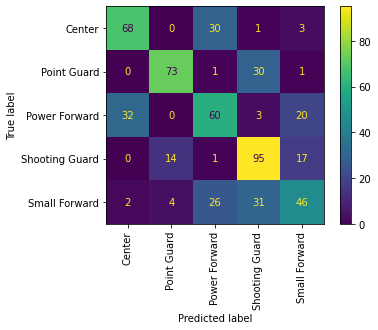

In [155]:
plot_confusion_matrix(best_grid,X_test4,y_test4,xticks_rotation='vertical');

Try the best params with the KNN Imputer

train accuracy: 0.6363569156188456 | test accuracy cross val: 0.628133704735376
train accuracy: 0.6374070595364338 | test accuracy cross val: 0.6225626740947076
train accuracy: 0.6374046356612635 | test accuracy cross val: 0.6309192200557103
train accuracy: 0.6342687471595212 | test accuracy cross val: 0.6350974930362117
train accuracy: 0.6342693531283139 | test accuracy cross val: 0.628133704735376
train accuracy: 0.6339227389789426 | test accuracy cross val: 0.628133704735376
train accuracy: 0.6325296167247386 | test accuracy cross val: 0.6309192200557103
train accuracy: 0.63392213301015 | test accuracy cross val: 0.6253481894150418
train accuracy: 0.6311358885017422 | test accuracy cross val: 0.6323119777158774


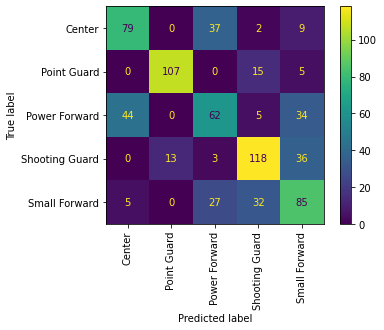

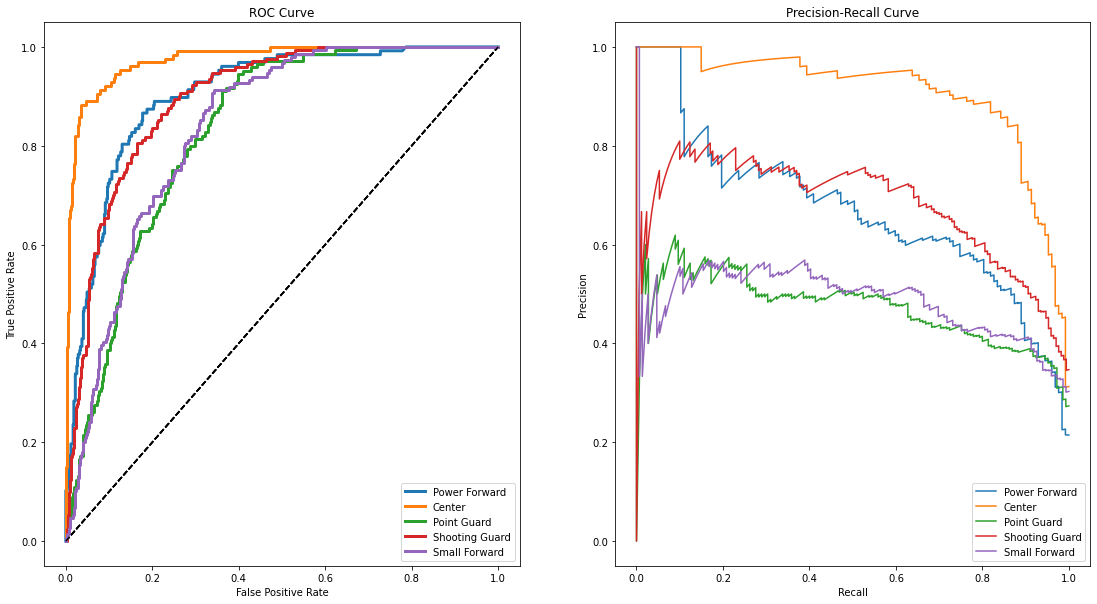

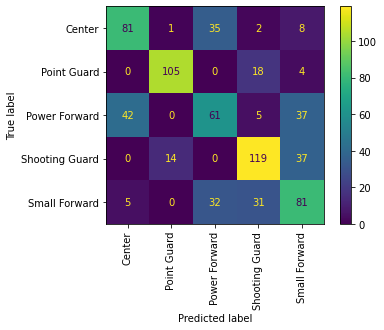

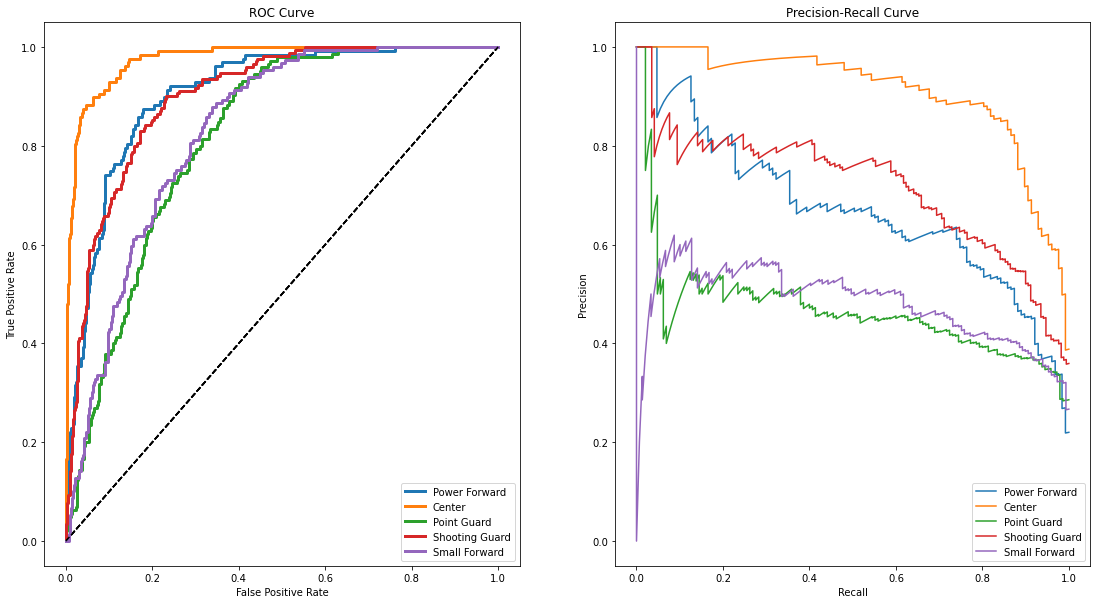

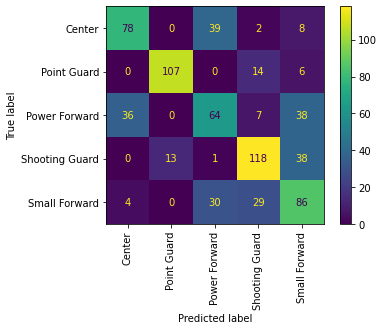

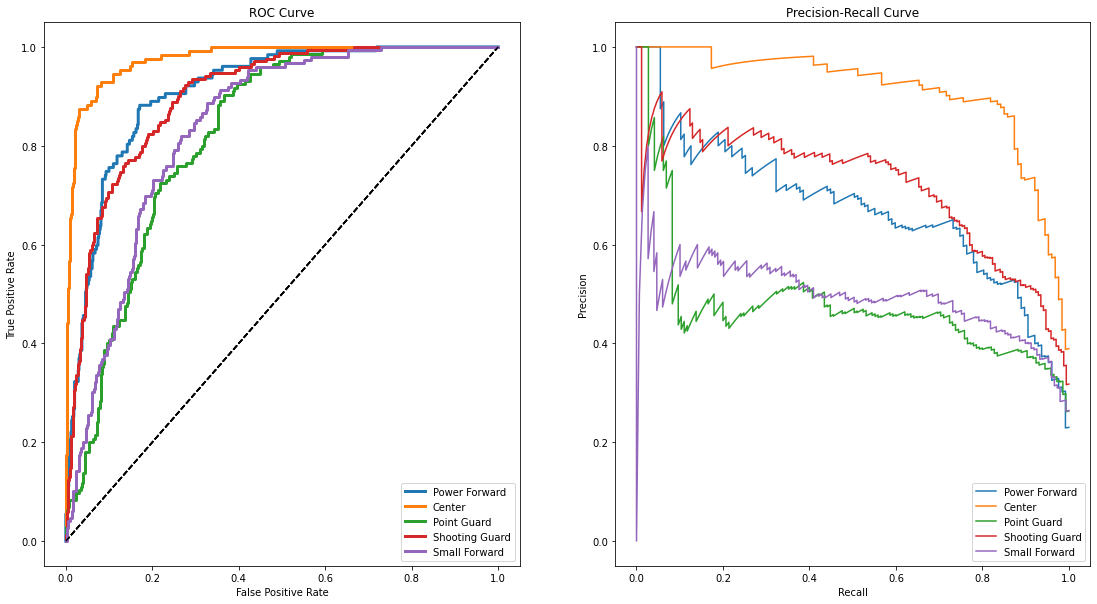

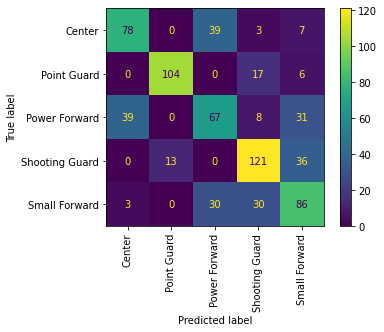

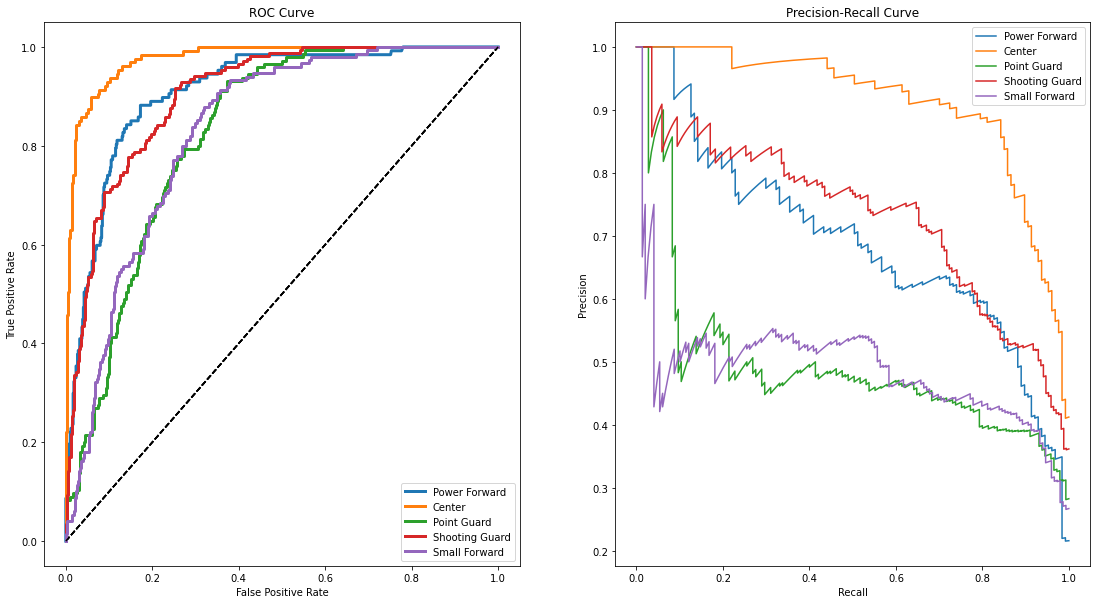

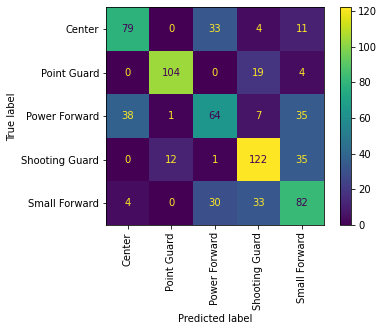

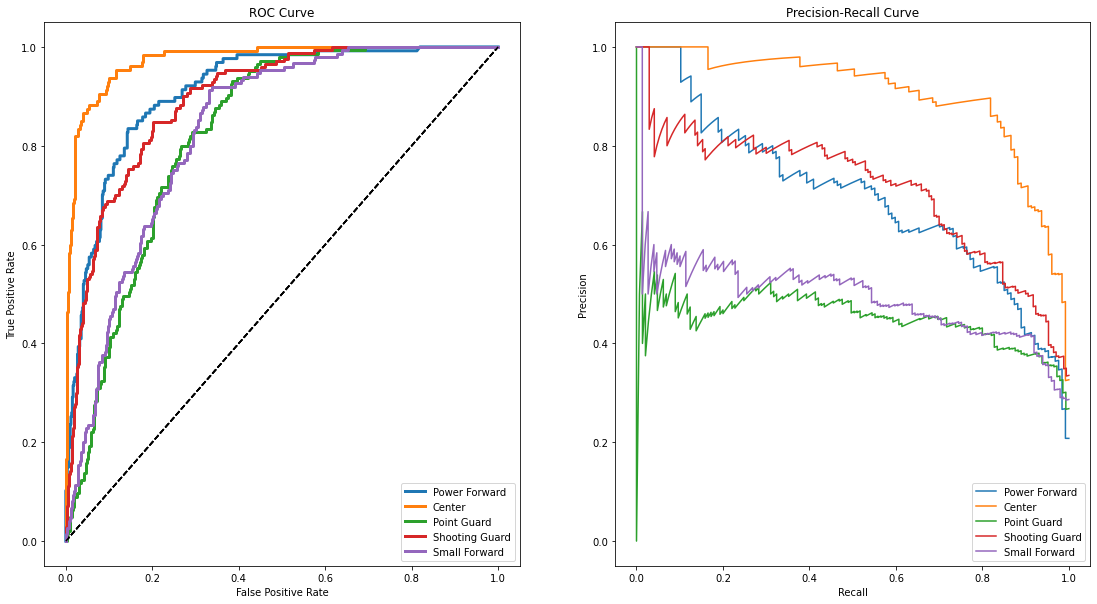

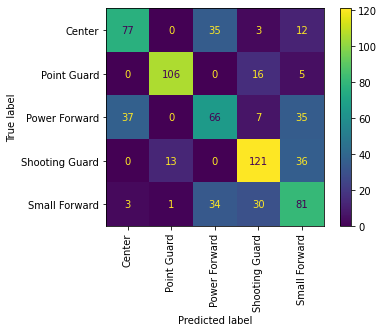

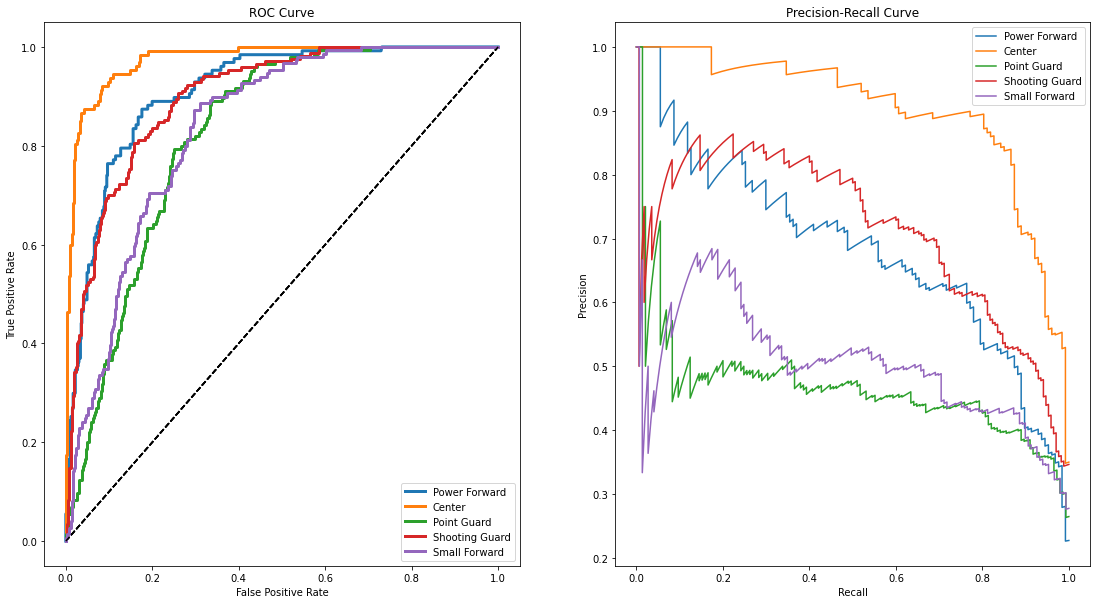

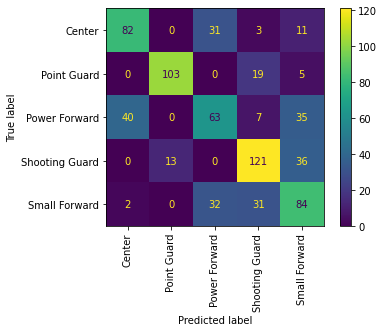

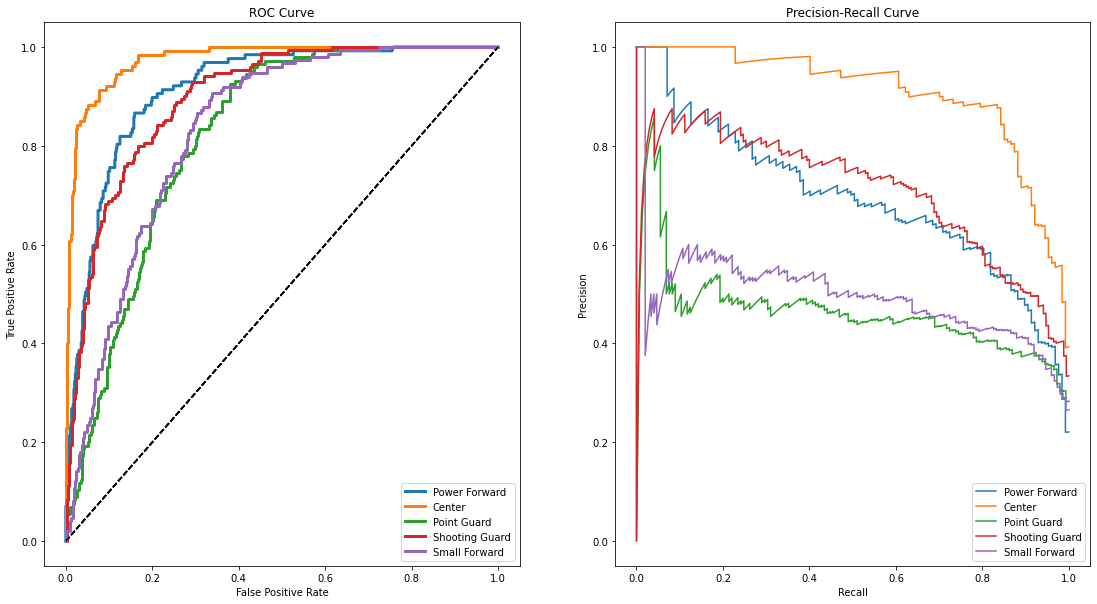

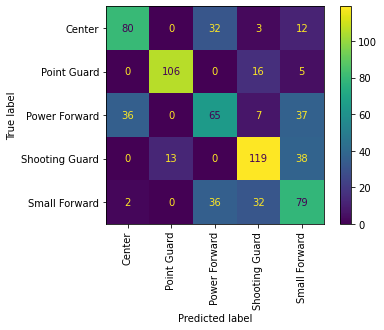

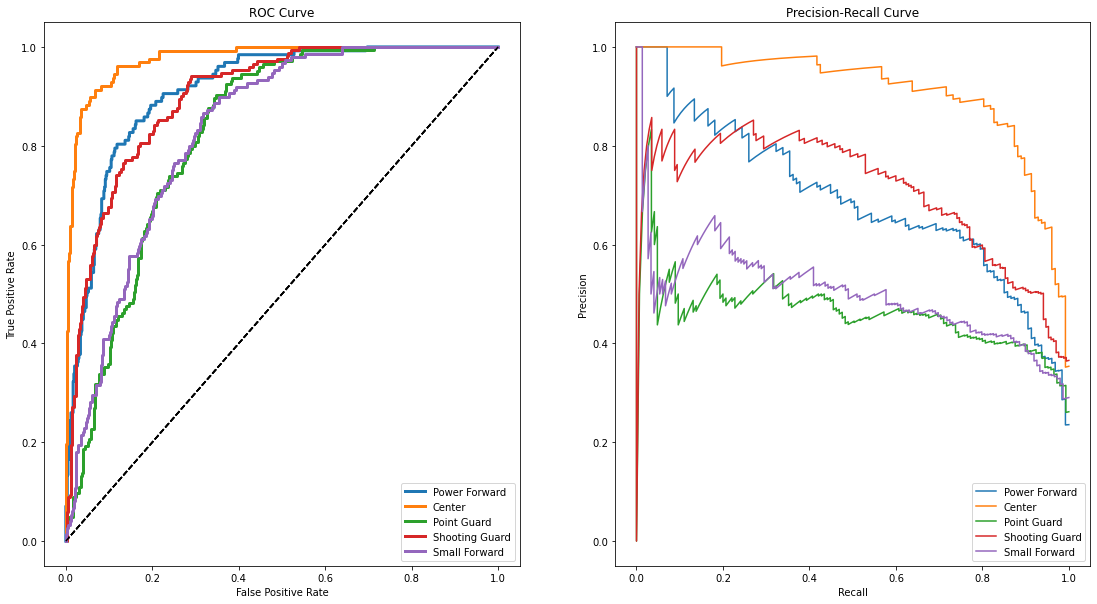

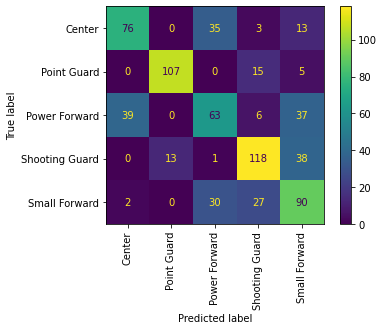

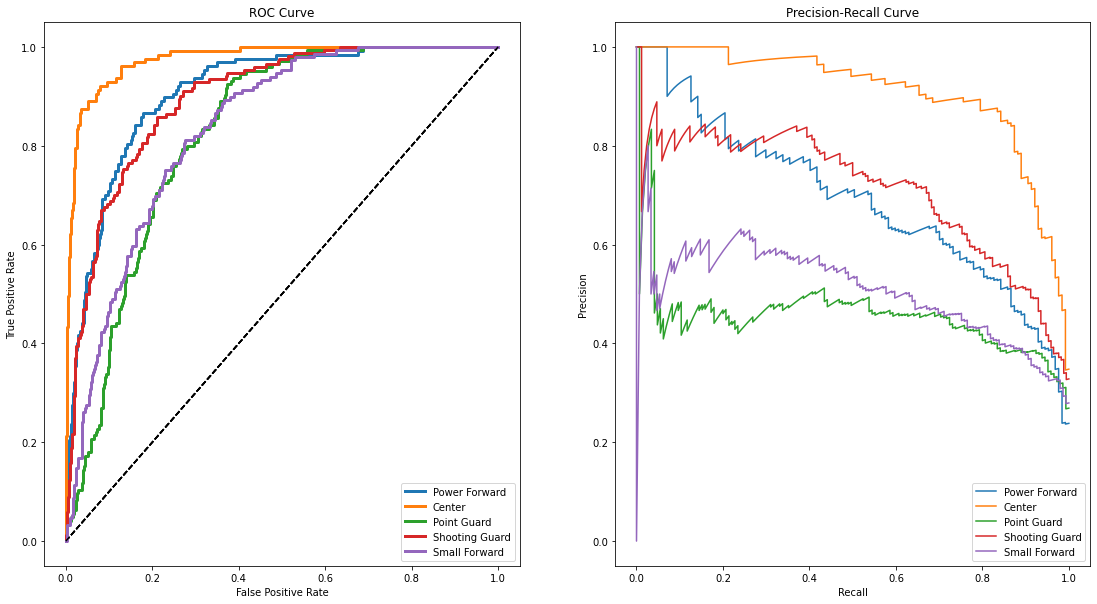

In [133]:
pick_k_rf(all_player_stats,all_player_stats.drop(['Pos','Num_Pos','Target','Player'],axis=1),all_player_stats['Target'],[i for i in range(1,10)],['PTS', 'TRB', 'AST', 'STL', 'BLK','2PA','3PA'])

Logistic Regression

In [119]:
grid={"C":[0.001,0.1,1,10,100,250,500,1000,2500,5000]}
logreg=LogisticRegression(max_iter=200)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train3,y_train3)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100}
accuracy : 0.6737777777777778


In [159]:
best_logreg_grid = logreg_cv.best_estimator_
best_logreg_grid .score(X_test3,y_test3)

0.6642984014209592

train accuracy: 0.6737777777777778 | test accuracy cross val: 0.6642984014209592


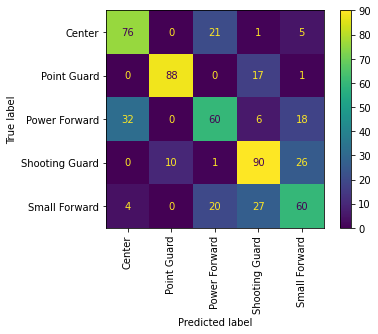

In [160]:
print(f'train accuracy: {cross_val_score(best_logreg_grid,X_train3,y_train3,cv=5).mean()} | test accuracy cross val: {best_logreg_grid.score(X_test3,y_test3)}')
plot_confusion_matrix(best_logreg_grid,X_test3,y_test3,xticks_rotation='vertical')

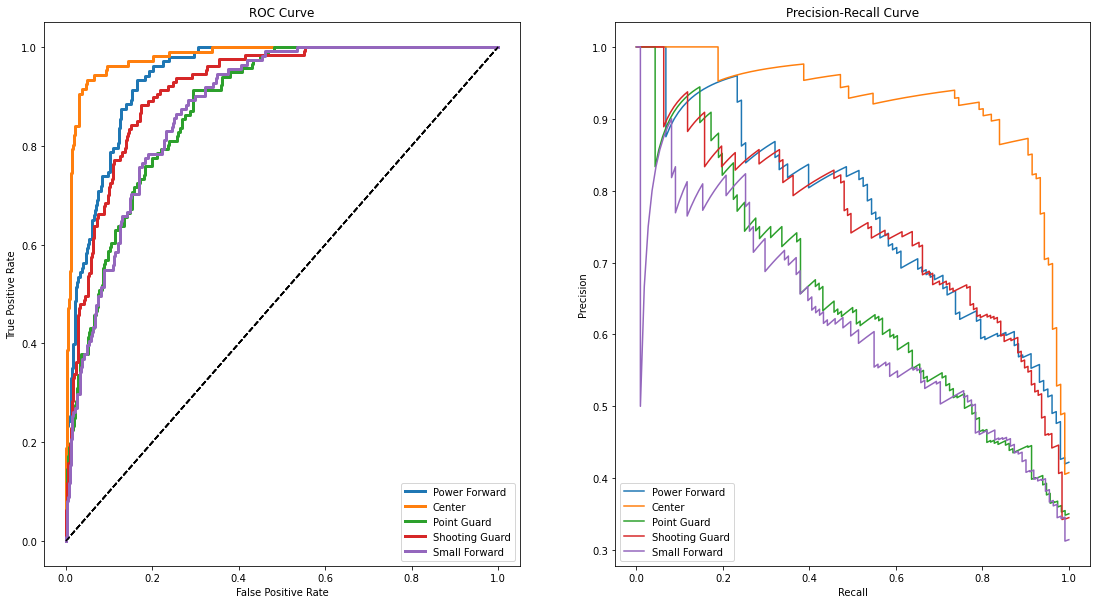

In [161]:
ROC(best_logreg_grid, X_test3, y_test3)

Try best params with KNN Imputer

train accuracy: 0.6325277988183607 | test accuracy cross val: 0.6420612813370473
train accuracy: 0.6387989698530526 | test accuracy cross val: 0.6476323119777159
train accuracy: 0.6401914861384639 | test accuracy cross val: 0.6518105849582173
train accuracy: 0.641584002423875 | test accuracy cross val: 0.6573816155988857
train accuracy: 0.640887138312377 | test accuracy cross val: 0.6545961002785515
train accuracy: 0.6374040296924709 | test accuracy cross val: 0.6462395543175488
train accuracy: 0.6384505377973034 | test accuracy cross val: 0.6476323119777159
train accuracy: 0.6384499318285108 | test accuracy cross val: 0.6476323119777159
train accuracy: 0.6370574155430996 | test accuracy cross val: 0.6462395543175488


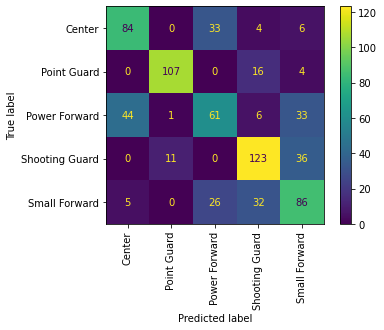

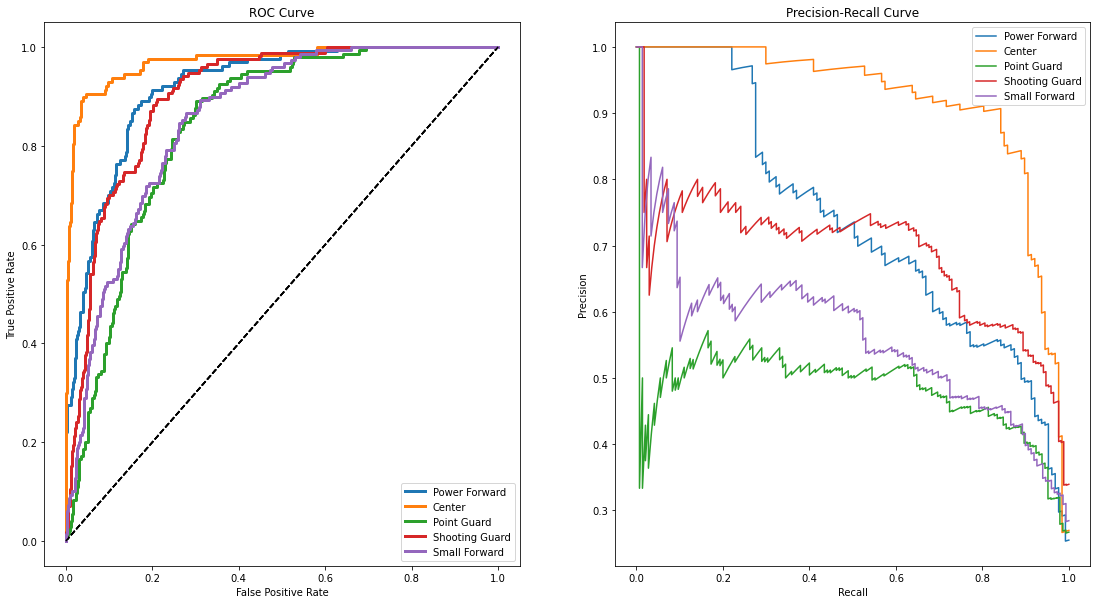

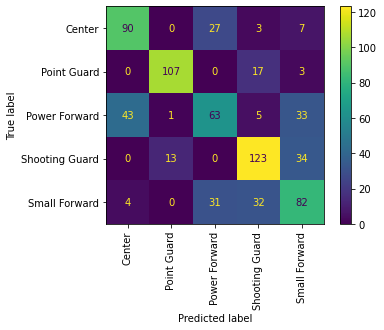

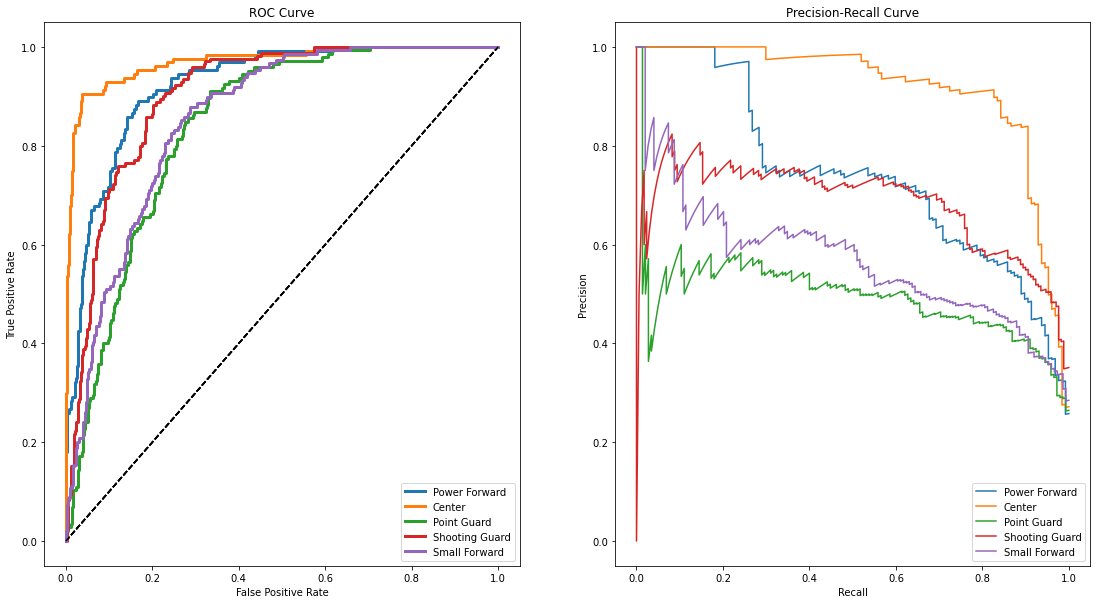

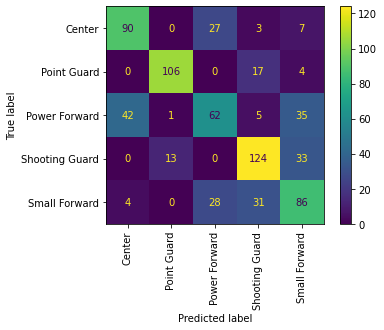

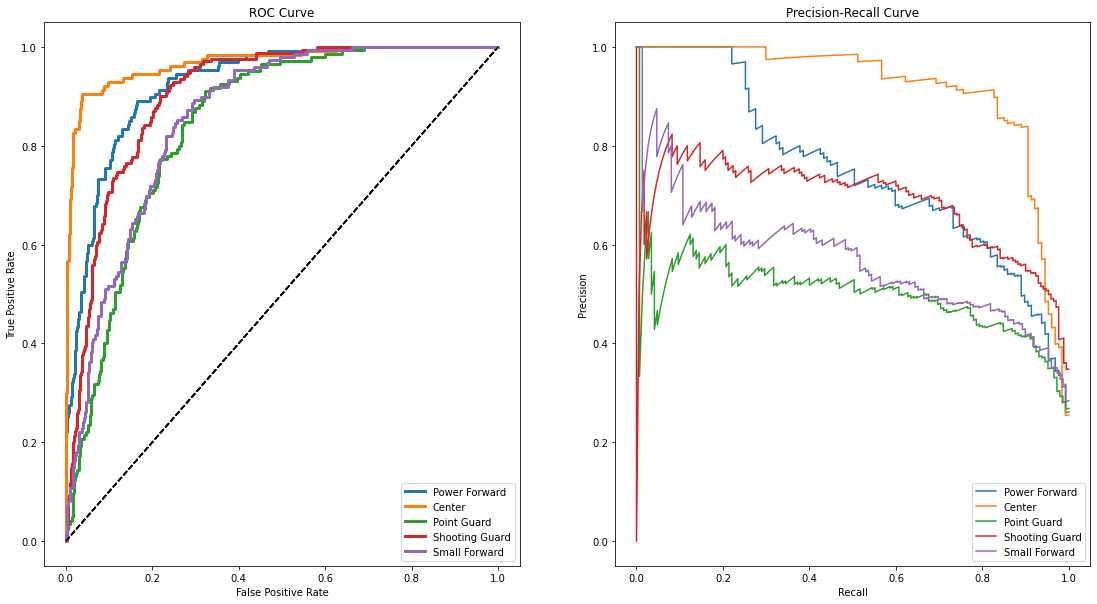

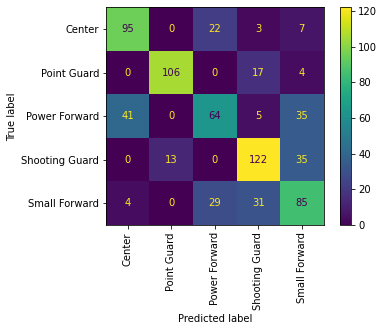

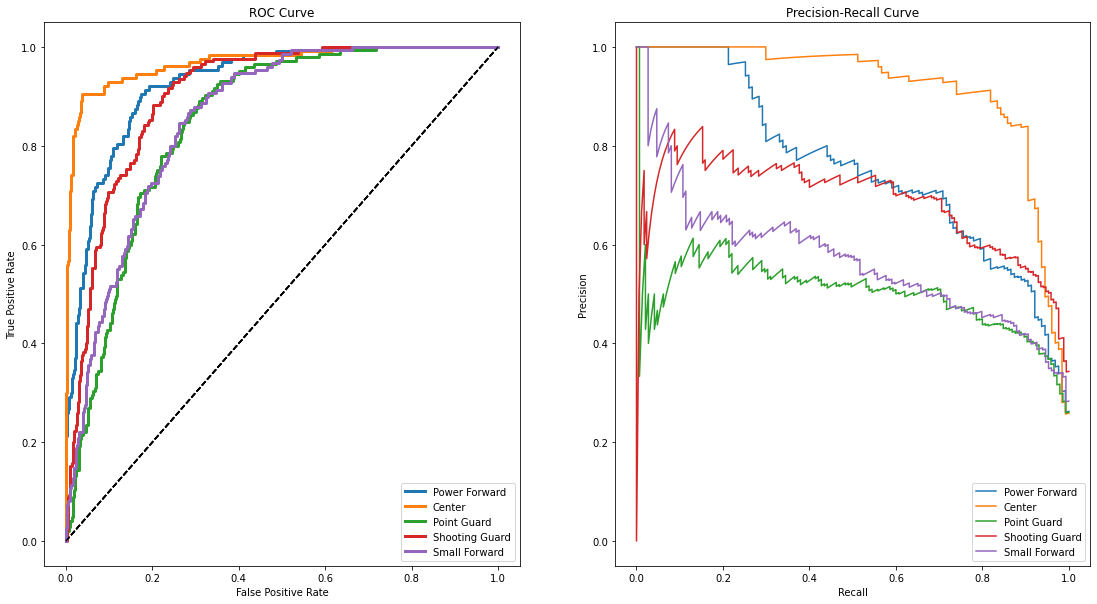

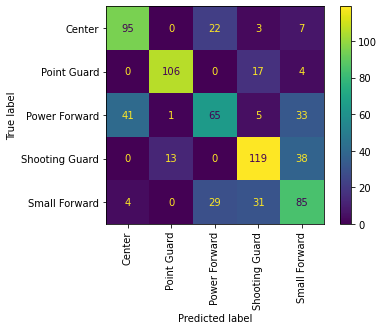

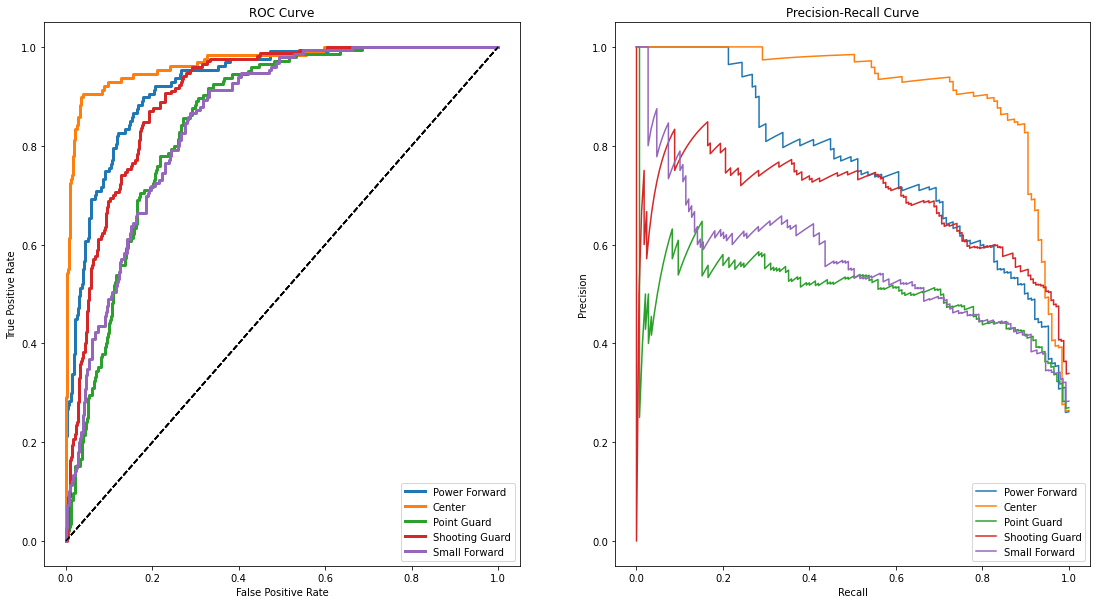

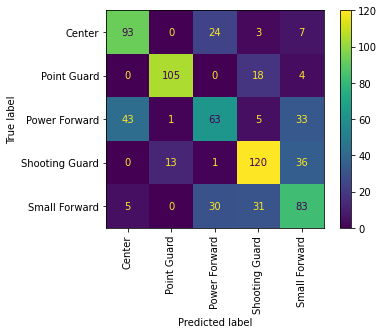

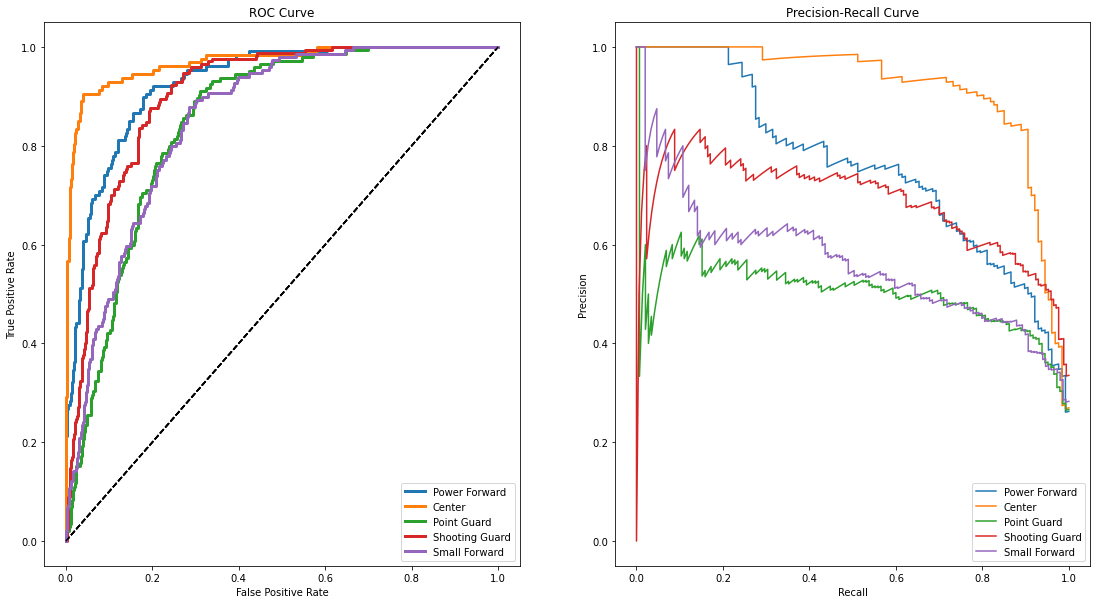

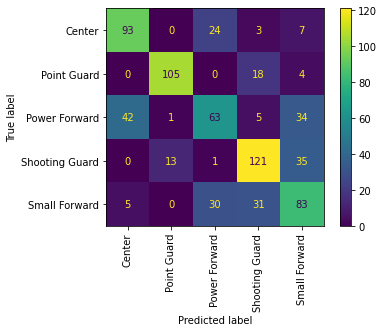

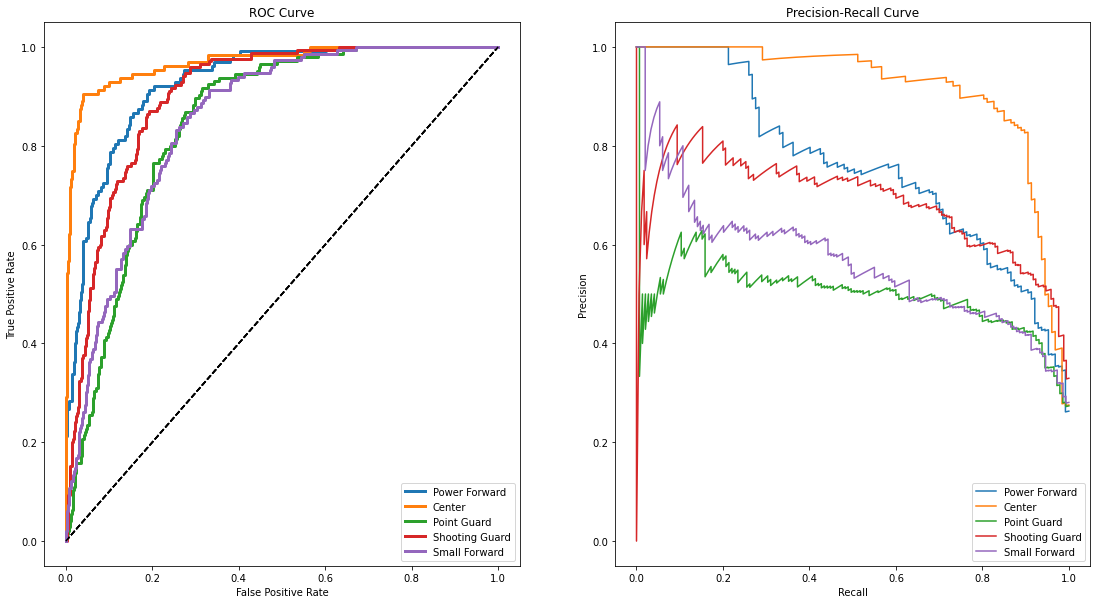

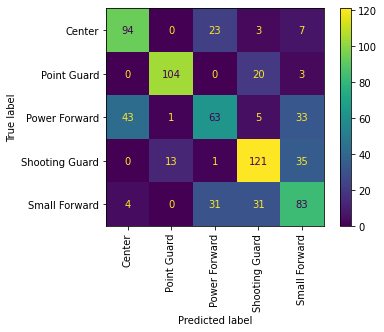

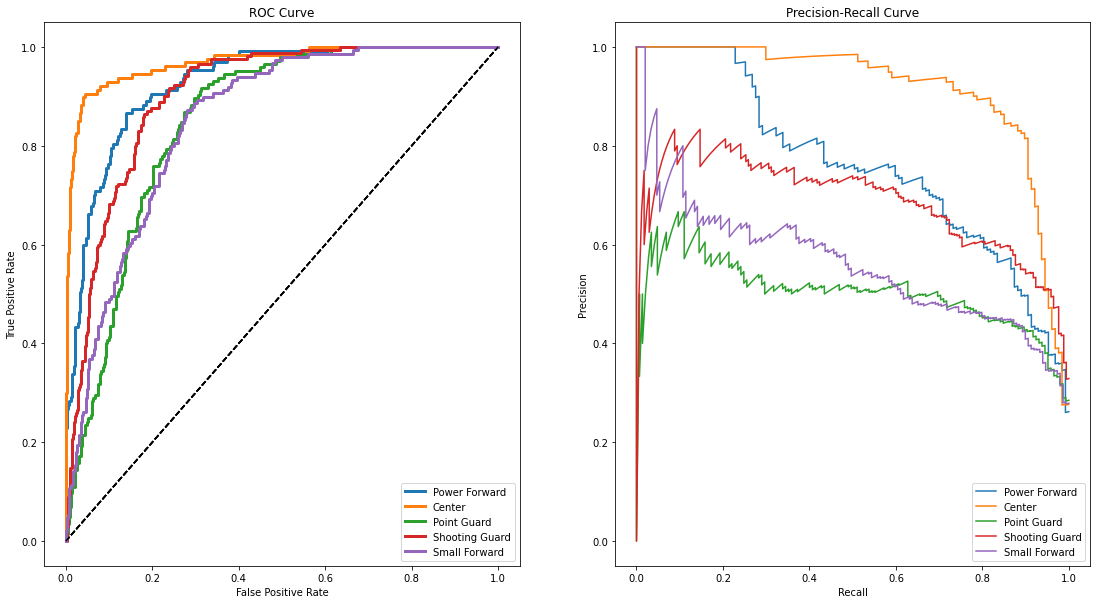

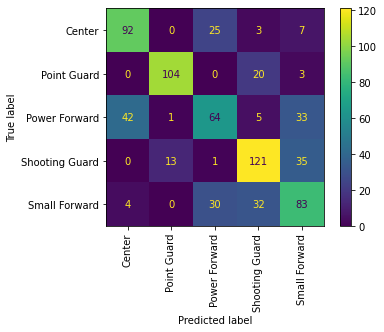

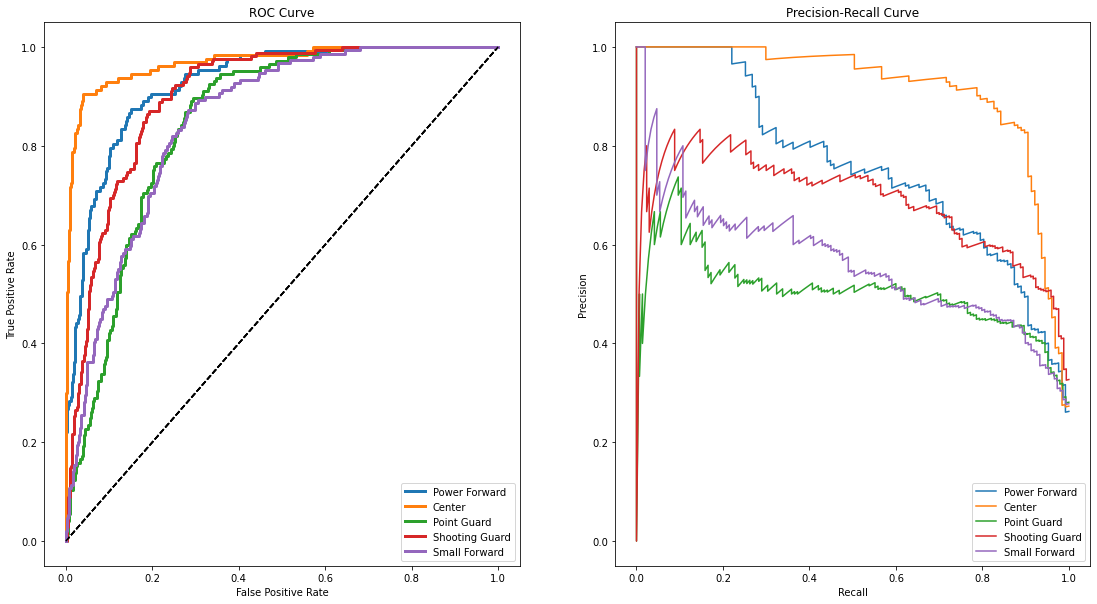

In [134]:
pick_k_lr(all_player_stats,all_player_stats.drop(['Pos','Num_Pos','Target','Player'],axis=1),all_player_stats['Target'],[i for i in range(1,10)],['PTS', 'TRB', 'AST', 'STL', 'BLK','2PA','3PA'])